In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Set option max columns display
pd.options.display.max_rows = 150

# import warning
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

#### Research about credit score

Based on FICO, theres category that consider to credit score :
1. Payment History : paid past credit accounts on time
2. Amounts Owed : if you are using a lot of your available credit, this may indicate that you are overextended
3. Length of Credit History : having a longer credit history is positive for your FICO Scores, but is not required for a good credit score.
4. Credit Mix : will consider your mix of credit cards, retail accounts, installment loans, finance company accounts and mortgage loans.
5. New Credit : Research shows that opening several credit accounts in a short amount of time represents a greater risk—especially for people who don't have a long credit history.
        
others 
1. Payment History (Extremely)
2. Age and Type of Credit (Highly)
3. %of Credit Use (Highly)
4. Total Balance/Debt (Moderately)
5. Recent Credit Behaviour (Less)
6. Available Credit (Least)
    

## Load Data

In [2]:
app_test   = pd.read_csv('data_final/application_test.csv')
app_train  = pd.read_csv('data_final/application_train.csv')
bureau_bal = pd.read_csv('data_final/bureau_balance.csv')
bureau     = pd.read_csv('data_final/bureau.csv')
cc_bal     = pd.read_csv('data_final/credit_card_balance.csv')
ins_pay    = pd.read_csv('data_final/installments_payments.csv')
posh_bal   = pd.read_csv('data_final/POS_CASH_balance.csv')
app_prev   = pd.read_csv('data_final/previous_application.csv')

## Data Understanding

### Application Train

In [3]:
list_data = []
for col in app_train :
    list_data.append([col, app_train[col].dtype, 
                     app_train[col].isna().sum(), round(app_train[col].isna().sum()/len(app_train[col])*100,2), 
                     app_train[col].nunique(), app_train[col].unique()[0:3]]
                    )
    info_data = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_data

,feature,data_type,amt_null,pct_null,unique,unique_data
0,SK_ID_CURR,int64,0,0.00,307511,"[100002, 100003, 100004]"
1,TARGET,int64,0,0.00,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,0,0.00,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,0,0.00,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,0,0.00,2,"[N, Y]"
5,FLAG_OWN_REALTY,object,0,0.00,2,"[Y, N]"
6,CNT_CHILDREN,int64,0,0.00,15,"[0, 1, 2]"
7,AMT_INCOME_TOTAL,float64,0,0.00,2548,"[202500.0, 270000.0, 67500.0]"
8,AMT_CREDIT,float64,0,0.00,5603,"[406597.5, 1293502.5, 135000.0]"
9,AMT_ANNUITY,float64,12,0.00,13672,"[24700.5, 35698.5, 6750.0]"


In [4]:
#check data duplicated
app_train.duplicated().sum()

0

### Bureau

In [5]:
list_data = []
for col in bureau :
    list_data.append([col, bureau[col].dtype, 
                     bureau[col].isna().sum(), round(bureau[col].isna().sum()/len(bureau[col])*100,2), 
                     bureau[col].nunique(), bureau[col].unique()[0:3]]
                    )
    info_bureau = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_bureau

,feature,data_type,amt_null,pct_null,unique,unique_data
0,SK_ID_CURR,int64,0,0.00,305811,"[215354, 162297, 402440]"
1,SK_ID_BUREAU,int64,0,0.00,1716428,"[5714462, 5714463, 5714464]"
2,CREDIT_ACTIVE,object,0,0.00,4,"[Closed, Active, Sold]"
3,CREDIT_CURRENCY,object,0,0.00,4,"[currency 1, currency 2, currency 4]"
4,DAYS_CREDIT,int64,0,0.00,2923,"[-497, -208, -203]"
5,CREDIT_DAY_OVERDUE,int64,0,0.00,942,"[0, 2603, 6]"
6,DAYS_CREDIT_ENDDATE,float64,105553,6.15,14096,"[-153.0, 1075.0, 528.0]"
7,DAYS_ENDDATE_FACT,float64,633653,36.92,2917,"[-153.0, nan, -1710.0]"
8,AMT_CREDIT_MAX_OVERDUE,float64,1124488,65.51,68251,"[nan, 77674.5, 0.0]"
9,CNT_CREDIT_PROLONG,int64,0,0.00,10,"[0, 2, 1]"


### Previous Application

In [6]:
list_data = []
for col in app_prev :
    list_data.append([col, app_prev[col].dtype, 
                     app_prev[col].isna().sum(), round(app_prev[col].isna().sum()/len(app_prev[col])*100,2), 
                     app_prev[col].nunique(), app_prev[col].unique()[0:3]]
                    )
    info_app_prev = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_app_prev

,feature,data_type,amt_null,pct_null,unique,unique_data
0,SK_ID_PREV,int64,0,0.00,1670214,"[2030495, 2802425, 2523466]"
1,SK_ID_CURR,int64,0,0.00,338857,"[271877, 108129, 122040]"
2,NAME_CONTRACT_TYPE,object,0,0.00,4,"[Consumer loans, Cash loans, Revolving loans]"
3,AMT_ANNUITY,float64,372235,22.29,357959,"[1730.43, 25188.615, 15060.735]"
4,AMT_APPLICATION,float64,0,0.00,93885,"[17145.0, 607500.0, 112500.0]"
5,AMT_CREDIT,float64,1,0.00,86803,"[17145.0, 679671.0, 136444.5]"
6,AMT_DOWN_PAYMENT,float64,895844,53.64,29278,"[0.0, nan, 12649.5]"
7,AMT_GOODS_PRICE,float64,385515,23.08,93885,"[17145.0, 607500.0, 112500.0]"
8,WEEKDAY_APPR_PROCESS_START,object,0,0.00,7,"[SATURDAY, THURSDAY, TUESDAY]"
9,HOUR_APPR_PROCESS_START,int64,0,0.00,24,"[15, 11, 7]"


### Credit Card

In [7]:
list_data = []
for col in cc_bal :
    list_data.append([col, cc_bal[col].dtype, 
                     cc_bal[col].isna().sum(), round(cc_bal[col].isna().sum()/len(cc_bal[col])*100,2), 
                     cc_bal[col].nunique(), cc_bal[col].unique()[0:3]]
                    )
    info_cc_bal = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_cc_bal

,feature,data_type,amt_null,pct_null,unique,unique_data
0,SK_ID_PREV,int64,0,0.00,104307,"[2562384, 2582071, 1740877]"
1,SK_ID_CURR,int64,0,0.00,103558,"[378907, 363914, 371185]"
2,MONTHS_BALANCE,int64,0,0.00,96,"[-6, -1, -7]"
3,AMT_BALANCE,float64,0,0.00,1347904,"[56.97, 63975.555, 31815.225]"
4,AMT_CREDIT_LIMIT_ACTUAL,int64,0,0.00,181,"[135000, 45000, 450000]"
5,AMT_DRAWINGS_ATM_CURRENT,float64,749816,19.52,2267,"[0.0, 2250.0, 67500.0]"
6,AMT_DRAWINGS_CURRENT,float64,0,0.00,187005,"[877.5, 2250.0, 0.0]"
7,AMT_DRAWINGS_OTHER_CURRENT,float64,749816,19.52,1832,"[0.0, 137700.0, nan]"
8,AMT_DRAWINGS_POS_CURRENT,float64,749816,19.52,168748,"[877.5, 0.0, 11547.0]"
9,AMT_INST_MIN_REGULARITY,float64,305236,7.95,312266,"[1700.325, 2250.0, 11795.76]"


In [8]:
list_data = []
for col in posh_bal :
    list_data.append([col, posh_bal[col].dtype, 
                     posh_bal[col].isna().sum(), round(posh_bal[col].isna().sum()/len(posh_bal[col])*100,2), 
                     posh_bal[col].nunique(), posh_bal[col].unique()[0:3]]
                    )
    info_posh_bal = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_posh_bal

,feature,data_type,amt_null,pct_null,unique,unique_data
0,SK_ID_PREV,int64,0,0.00,936325,"[1803195, 1715348, 1784872]"
1,SK_ID_CURR,int64,0,0.00,337252,"[182943, 367990, 397406]"
2,MONTHS_BALANCE,int64,0,0.00,96,"[-31, -33, -32]"
3,CNT_INSTALMENT,float64,26071,0.26,73,"[48.0, 36.0, 12.0]"
4,CNT_INSTALMENT_FUTURE,float64,26087,0.26,79,"[45.0, 35.0, 9.0]"
5,NAME_CONTRACT_STATUS,object,0,0.00,9,"[Active, Completed, Signed]"
6,SK_DPD,int64,0,0.00,3400,"[0, 1, 2]"
7,SK_DPD_DEF,int64,0,0.00,2307,"[0, 1, 2]"


## Combine Data

### Bureau

1. berapa banyak pinjaman yg diajukan di kredit lain? berapa yang active, close, sold, dan bad dept **CREDIT ACTIVE**
2. apakah dia pernah punya tunggakan ? (ini cek lg maksudnga tunggakan gagal bayar atau sisa amount) **AMT_CREDIT_SUM_OVERDUE == 1 is available, amt>0** 

In [9]:
bureau_bal1 = bureau_bal[bureau_bal['MONTHS_BALANCE']!=0].groupby(['SK_ID_BUREAU'],as_index=False).agg({'MONTHS_BALANCE':'max'})
bureau_bal1 = bureau_bal1.merge(bureau_bal, on=['SK_ID_BUREAU','MONTHS_BALANCE'])
bureau_bal1

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5001709,-1,C
1,5001710,-1,C
2,5001711,-1,0
3,5001712,-1,C
4,5001713,-1,X
...,...,...,...
812206,6842884,-1,C
812207,6842885,-1,5
812208,6842886,-1,C
812209,6842887,-1,C


In [10]:
#One Hot to calculate per credit category
y = pd.get_dummies(bureau.CREDIT_ACTIVE, prefix='bstat')
bureau1 = bureau.join(y)

#Labelling overdue on bureau credit
bureau1['b_overdue'] = bureau1['AMT_CREDIT_SUM_OVERDUE'].apply(lambda x : 1 if(x>0) else 0)

#join with bureau_balance
bureau2 = bureau1.merge(bureau_bal1,left_on=['SK_ID_BUREAU'],right_on=['SK_ID_BUREAU'],how='left')

bureau2['STATUS'] = bureau2['STATUS'].fillna('X')
bureau2['MONTHS_BALANCE'] = bureau2['MONTHS_BALANCE'].fillna(int(0))

#One Hot to calculate per credit dpd status
y = pd.get_dummies(bureau2.STATUS, prefix='dpd_b')
bureau2 = bureau2.join(y)

bureau2

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,MONTHS_BALANCE,STATUS,dpd_b_0,dpd_b_1,dpd_b_2,dpd_b_3,dpd_b_4,dpd_b_5,dpd_b_C,dpd_b_X
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,0.0,X,0,0,0,0,0,0,0,1
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,0.0,X,0,0,0,0,0,0,0,1
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,0.0,X,0,0,0,0,0,0,0,1
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,0.0,X,0,0,0,0,0,0,0,1
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,0.0,X,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,...,0.0,X,0,0,0,0,0,0,0,1
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,...,0.0,X,0,0,0,0,0,0,0,1
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,...,0.0,X,0,0,0,0,0,0,0,1
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,...,0.0,X,0,0,0,0,0,0,0,1


In [11]:
#dataframe bureau group

join_bureau = bureau2.groupby(['SK_ID_CURR'],as_index=False).agg({'bstat_Active':'sum',
                                                   'bstat_Bad debt':'sum',
                                                   'bstat_Closed':'sum',
                                                   'bstat_Sold':'sum',
                                                   'dpd_b_0':'sum',
                                                   'dpd_b_1':'sum',
                                                   'dpd_b_2':'sum',
                                                    'dpd_b_3':'sum',
                                                    'dpd_b_4':'sum',
                                                    'dpd_b_5':'sum',
                                                    'dpd_b_C':'sum',
                                                    'dpd_b_X':'sum',
                                                   'b_overdue' : 'max',
                                                
                                                  })
join_bureau['b_all'] = join_bureau.iloc[:,1:5].sum(axis=1)

#join_bureau['cek'] = join_bureau['b_all']- join_bureau.iloc[:,5:13].sum(axis=1)
join_bureau

,SK_ID_CURR,bstat_Active,bstat_Bad debt,bstat_Closed,bstat_Sold,dpd_b_0,dpd_b_1,dpd_b_2,dpd_b_3,dpd_b_4,dpd_b_5,dpd_b_C,dpd_b_X,b_overdue,b_all
0,100001,3,0,4,0,2,0,0,0,0,0,4,1,0,7
1,100002,2,0,6,0,2,0,0,0,0,0,6,0,0,8
2,100003,1,0,3,0,0,0,0,0,0,0,0,4,0,4
3,100004,0,0,2,0,0,0,0,0,0,0,0,2,0,2
4,100005,2,0,1,0,2,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,2,0,11,0,0,0,0,0,0,0,0,13,0,13
305807,456250,2,0,1,0,2,0,0,0,0,0,1,0,0,3
305808,456253,2,0,2,0,1,0,0,0,0,0,3,0,0,4
305809,456254,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [12]:
list_data = []
for col in join_bureau :
    list_data.append([col, join_bureau[col].dtype, 
                     join_bureau[col].isna().sum(), round(join_bureau[col].isna().sum()/len(join_bureau[col])*100,2), 
                     join_bureau[col].nunique(), join_bureau[col].unique()[0:3]]
                    )
    info_data = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_data

,feature,data_type,amt_null,pct_null,unique,unique_data
0,SK_ID_CURR,int64,0,0.0,305811,"[100001, 100002, 100003]"
1,bstat_Active,uint8,0,0.0,23,"[3, 2, 1]"
2,bstat_Bad debt,uint8,0,0.0,2,"[0, 1]"
3,bstat_Closed,uint8,0,0.0,57,"[4, 6, 3]"
4,bstat_Sold,uint8,0,0.0,8,"[0, 1, 4]"
5,dpd_b_0,uint8,0,0.0,29,"[2, 0, 5]"
6,dpd_b_1,uint8,0,0.0,12,"[0, 1, 3]"
7,dpd_b_2,uint8,0,0.0,5,"[0, 1, 2]"
8,dpd_b_3,uint8,0,0.0,3,"[0, 1, 2]"
9,dpd_b_4,uint8,0,0.0,3,"[0, 1, 2]"


### Previous Application
1. berapa banyak pinjaman sebelumnya ? **NAME_CONTRACT_STATUS**
2. DPD pada masing masing pinjaman, maximum **Credit Card : SK_DPD*

In [13]:
#One Hot to calculate per credit category
y = pd.get_dummies(app_prev.NAME_CONTRACT_STATUS, prefix='prevstat')
app_prev1 = app_prev.join(y)

print(app_prev1.columns[37:41])

app_prev1['prev_all'] = app_prev1.iloc[:,37:41].sum(axis=1)

app_prev1

Index(['prevstat_Approved', 'prevstat_Canceled', 'prevstat_Refused',
       'prevstat_Unused offer'],
      dtype='object')


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,prevstat_Approved,prevstat_Canceled,prevstat_Refused,prevstat_Unused offer,prev_all
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,-42.0,300.0,-42.0,-37.0,0.0,1,0,0,0,1
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,-134.0,916.0,365243.0,365243.0,1.0,1,0,0,0,1
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,-271.0,59.0,365243.0,365243.0,1.0,1,0,0,0,1
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,-482.0,-152.0,-182.0,-177.0,1.0,1,0,0,0,1
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,-508.0,362.0,-358.0,-351.0,0.0,1,0,0,0,1
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,-1604.0,-1274.0,-1304.0,-1297.0,0.0,1,0,0,0,1
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,-1457.0,-1187.0,-1187.0,-1181.0,0.0,1,0,0,0,1
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,-1155.0,-825.0,-825.0,-817.0,1.0,1,0,0,0,1


In [14]:
def class_dpd (x) :
    if(x==0) :
        stat = 0
    elif(x<=30) :
        stat = 1
    elif (x<=60) :
        stat = 2
    elif (x<=90) :
        stat = 3
    elif (x<=120):
        stat = 4
    else :
        stat = 5
    return stat

In [15]:
#posh
posh_bal1 = posh_bal.groupby('SK_ID_PREV',as_index=False).agg({'MONTHS_BALANCE':'max'})
posh_bal1 = posh_bal1.merge(posh_bal, on =['SK_ID_PREV','MONTHS_BALANCE'])
#posh_bal1 = posh_bal.copy()
posh_bal1['dpd_class'] = posh_bal1['SK_DPD'].apply(lambda x : class_dpd(x) )

y = pd.get_dummies(posh_bal1.dpd_class, prefix='dpd_po')
posh_bal1 = posh_bal1.join(y)

join_posh = posh_bal1.groupby(['SK_ID_PREV'],as_index=False).agg({'dpd_po_0':'max',
                                                                  'dpd_po_1':'max',
                                                                  'dpd_po_2':'max',
                                                                  'dpd_po_3':'max',
                                                                  'dpd_po_4':'max',
                                                                  'dpd_po_5':'max',
                                                                })
join_posh

,SK_ID_PREV,dpd_po_0,dpd_po_1,dpd_po_2,dpd_po_3,dpd_po_4,dpd_po_5
0,1000001,1,0,0,0,0,0
1,1000002,1,0,0,0,0,0
2,1000003,1,0,0,0,0,0
3,1000004,1,0,0,0,0,0
4,1000005,1,0,0,0,0,0
...,...,...,...,...,...,...,...
936320,2843494,1,0,0,0,0,0
936321,2843495,1,0,0,0,0,0
936322,2843497,1,0,0,0,0,0
936323,2843498,1,0,0,0,0,0


In [16]:
#CC
cc_bal1 = cc_bal.groupby('SK_ID_PREV',as_index=False).agg({'MONTHS_BALANCE':'max'})
cc_bal1 = cc_bal1.merge(cc_bal, on =['SK_ID_PREV','MONTHS_BALANCE'])
#cc_bal1 = cc_bal.copy()
cc_bal1['dpd_class'] = cc_bal1['SK_DPD'].apply(lambda x : class_dpd(x) )

y = pd.get_dummies(cc_bal1.dpd_class, prefix='dpd_po')
cc_bal1 = cc_bal1.join(y)

join_cc = cc_bal1.groupby(['SK_ID_PREV'],as_index=False).agg({'dpd_po_0':'max',
                                                                  'dpd_po_1':'max',
                                                                  'dpd_po_2':'max',
                                                                  'dpd_po_3':'max',
                                                                  'dpd_po_4':'max',
                                                                  'dpd_po_5':'max',
                                                                })
join_cc

,SK_ID_PREV,dpd_po_0,dpd_po_1,dpd_po_2,dpd_po_3,dpd_po_4,dpd_po_5
0,1000018,1,0,0,0,0,0
1,1000030,1,0,0,0,0,0
2,1000031,1,0,0,0,0,0
3,1000035,1,0,0,0,0,0
4,1000077,1,0,0,0,0,0
...,...,...,...,...,...,...,...
104302,2843476,1,0,0,0,0,0
104303,2843477,1,0,0,0,0,0
104304,2843478,1,0,0,0,0,0
104305,2843493,1,0,0,0,0,0


In [17]:
# concantenate join posh and cc
join_po_cc = pd.concat([join_cc,join_posh])
join_po_cc

,SK_ID_PREV,dpd_po_0,dpd_po_1,dpd_po_2,dpd_po_3,dpd_po_4,dpd_po_5
0,1000018,1,0,0,0,0,0
1,1000030,1,0,0,0,0,0
2,1000031,1,0,0,0,0,0
3,1000035,1,0,0,0,0,0
4,1000077,1,0,0,0,0,0
...,...,...,...,...,...,...,...
936320,2843494,1,0,0,0,0,0
936321,2843495,1,0,0,0,0,0
936322,2843497,1,0,0,0,0,0
936323,2843498,1,0,0,0,0,0


In [18]:
join_prev = app_prev1.merge(join_po_cc,left_on='SK_ID_PREV',right_on='SK_ID_PREV',how='left')
join_prev[join_prev.columns[-8:-1]] = join_prev[join_prev.columns[-8:-1]].fillna(int(0))
join_prev

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,prevstat_Canceled,prevstat_Refused,prevstat_Unused offer,prev_all,dpd_po_0,dpd_po_1,dpd_po_2,dpd_po_3,dpd_po_4,dpd_po_5
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#dataframe prev group

join_prev1 = join_prev.groupby(['SK_ID_CURR'],as_index=False).agg({'prevstat_Approved':'sum',
                                                   'prevstat_Canceled':'sum',
                                                   'prevstat_Refused':'sum',
                                                   'prevstat_Unused offer':'sum',
                                                   'dpd_po_0':'sum',
                                                   'dpd_po_1':'sum',
                                                   'dpd_po_2':'sum',
                                                    'dpd_po_3':'sum',
                                                    'dpd_po_4':'sum',
                                                    'dpd_po_5':'sum',
                                                   'prev_all' : 'sum',
                                                  })

print(join_prev1.columns[5:11])
join_prev1['dpd_po_X'] = join_prev1['prev_all'] - join_prev1.iloc[:,5:11].sum(axis=1)
join_prev1 = join_prev1[['SK_ID_CURR', 'prevstat_Approved', 'prevstat_Canceled',
            'prevstat_Refused', 'prevstat_Unused offer', 'dpd_po_0', 'dpd_po_1',
            'dpd_po_2', 'dpd_po_3', 'dpd_po_4', 'dpd_po_5', 'dpd_po_X','prev_all']]

join_prev1.sample(10)

Index(['dpd_po_0', 'dpd_po_1', 'dpd_po_2', 'dpd_po_3', 'dpd_po_4', 'dpd_po_5'], dtype='object')


,SK_ID_CURR,prevstat_Approved,prevstat_Canceled,prevstat_Refused,prevstat_Unused offer,dpd_po_0,dpd_po_1,dpd_po_2,dpd_po_3,dpd_po_4,dpd_po_5,dpd_po_X,prev_all
306586,422629,2,0,7,0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,9
71697,175325,10,2,6,0,10.0,0.0,0.0,0.0,0.0,0.0,8.0,18
54542,157279,2,0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1560,101629,4,1,8,0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,13
275242,388986,2,0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2
184868,294461,2,0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2
288823,403362,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
197718,307988,3,3,1,0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,7
13483,114133,2,0,4,0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,6
248920,361800,6,3,1,0,6.0,0.0,0.0,0.0,0.0,0.0,4.0,10


In [20]:
list_data = []
for col in join_prev1 :
    list_data.append([col, join_prev1[col].dtype, 
                     join_prev1[col].isna().sum(), round(join_prev1[col].isna().sum()/len(join_prev1[col])*100,2), 
                     join_prev1[col].nunique(), join_prev1[col].unique()[0:3]]
                    )
    info_data = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_data

,feature,data_type,amt_null,pct_null,unique,unique_data
0,SK_ID_CURR,int64,0,0.0,338857,"[100001, 100002, 100003]"
1,prevstat_Approved,uint8,0,0.0,26,"[1, 3, 5]"
2,prevstat_Canceled,uint8,0,0.0,40,"[0, 1, 3]"
3,prevstat_Refused,uint8,0,0.0,47,"[0, 1, 10]"
4,prevstat_Unused offer,uint8,0,0.0,13,"[0, 1, 3]"
5,dpd_po_0,float64,0,0.0,25,"[1.0, 3.0, 4.0]"
6,dpd_po_1,float64,0,0.0,5,"[0.0, 2.0, 1.0]"
7,dpd_po_2,float64,0,0.0,5,"[0.0, 1.0, 2.0]"
8,dpd_po_3,float64,0,0.0,4,"[0.0, 1.0, 2.0]"
9,dpd_po_4,float64,0,0.0,4,"[0.0, 1.0, 2.0]"


## apakah data DPD yang nan nya ada di cc balance?

In [21]:
cek_cc = pd.DataFrame({'ID_cc' : cc_bal['SK_ID_PREV'].sort_values().unique()})
cek_cc['amt_cc'] = np.repeat(1,cek_cc.shape[0])
cek_posh = pd.DataFrame({'ID_posh' : posh_bal['SK_ID_PREV'].sort_values().unique()})
cek_posh['amt_posh'] = np.repeat(1,cek_posh.shape[0])

cek = cek_cc.merge(cek_posh,left_on='ID_cc',right_on='ID_posh', how='outer')
cek['all'] = cek[['amt_cc', 'amt_posh']].sum(axis=1)

cek['all'].min(), cek['all'].max()

(1.0, 1.0)

In [22]:
data_combine = pd.merge(pd.merge(app_train,join_bureau,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='left'),\
                        join_prev1,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='left')
data_combine

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,prevstat_Refused,prevstat_Unused offer,dpd_po_0,dpd_po_1,dpd_po_2,dpd_po_3,dpd_po_4,dpd_po_5,dpd_po_X,prev_all
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [23]:
list_data = []
for col in data_combine :
    list_data.append([col, data_combine[col].dtype, 
                     data_combine[col].isna().sum(), round(data_combine[col].isna().sum()/len(data_combine[col])*100,2), 
                     data_combine[col].nunique(), data_combine[col].unique()[0:3]]
                    )
    info_data = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_data

,feature,data_type,amt_null,pct_null,unique,unique_data
0,SK_ID_CURR,int64,0,0.00,307511,"[100002, 100003, 100004]"
1,TARGET,int64,0,0.00,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,0,0.00,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,0,0.00,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,0,0.00,2,"[N, Y]"
5,FLAG_OWN_REALTY,object,0,0.00,2,"[Y, N]"
6,CNT_CHILDREN,int64,0,0.00,15,"[0, 1, 2]"
7,AMT_INCOME_TOTAL,float64,0,0.00,2548,"[202500.0, 270000.0, 67500.0]"
8,AMT_CREDIT,float64,0,0.00,5603,"[406597.5, 1293502.5, 135000.0]"
9,AMT_ANNUITY,float64,12,0.00,13672,"[24700.5, 35698.5, 6750.0]"


## Feature Extraction

- filter data with <15% null 
- replace data nan value buraeau days and social circle inq  with zero
- convert days to year
- make length payment (month) from credit amount/credit anuity
- get payment and length history


In [24]:
filter_col  = info_data[info_data['pct_null']<=15]['feature'].to_list()
data_filter1 = data_combine[filter_col]
data_filter  = data_filter1.copy()

In [84]:
info_data[info_data['pct_null']<=15]['feature'].to_list()

['TARGET',
 'FLAG_OWN_CAR',
 'FLAG_MOBIL',
 'REGION_RATING_CLIENT_W_CITY',
 'CODE_GENDER',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'REG_CITY_NOT_LIVE_CITY',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'EXT_SOURCE_2_2',
 'EXT_SOURCE_2_2_4',
 'EX

## EDA

In [25]:
num = data_filter.select_dtypes(include='number').columns
cat = data_filter.select_dtypes(include='object').columns

len(num), len(cat)

(86, 11)

### Numerical Univariate Analysis

In [26]:
data_filter[num].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


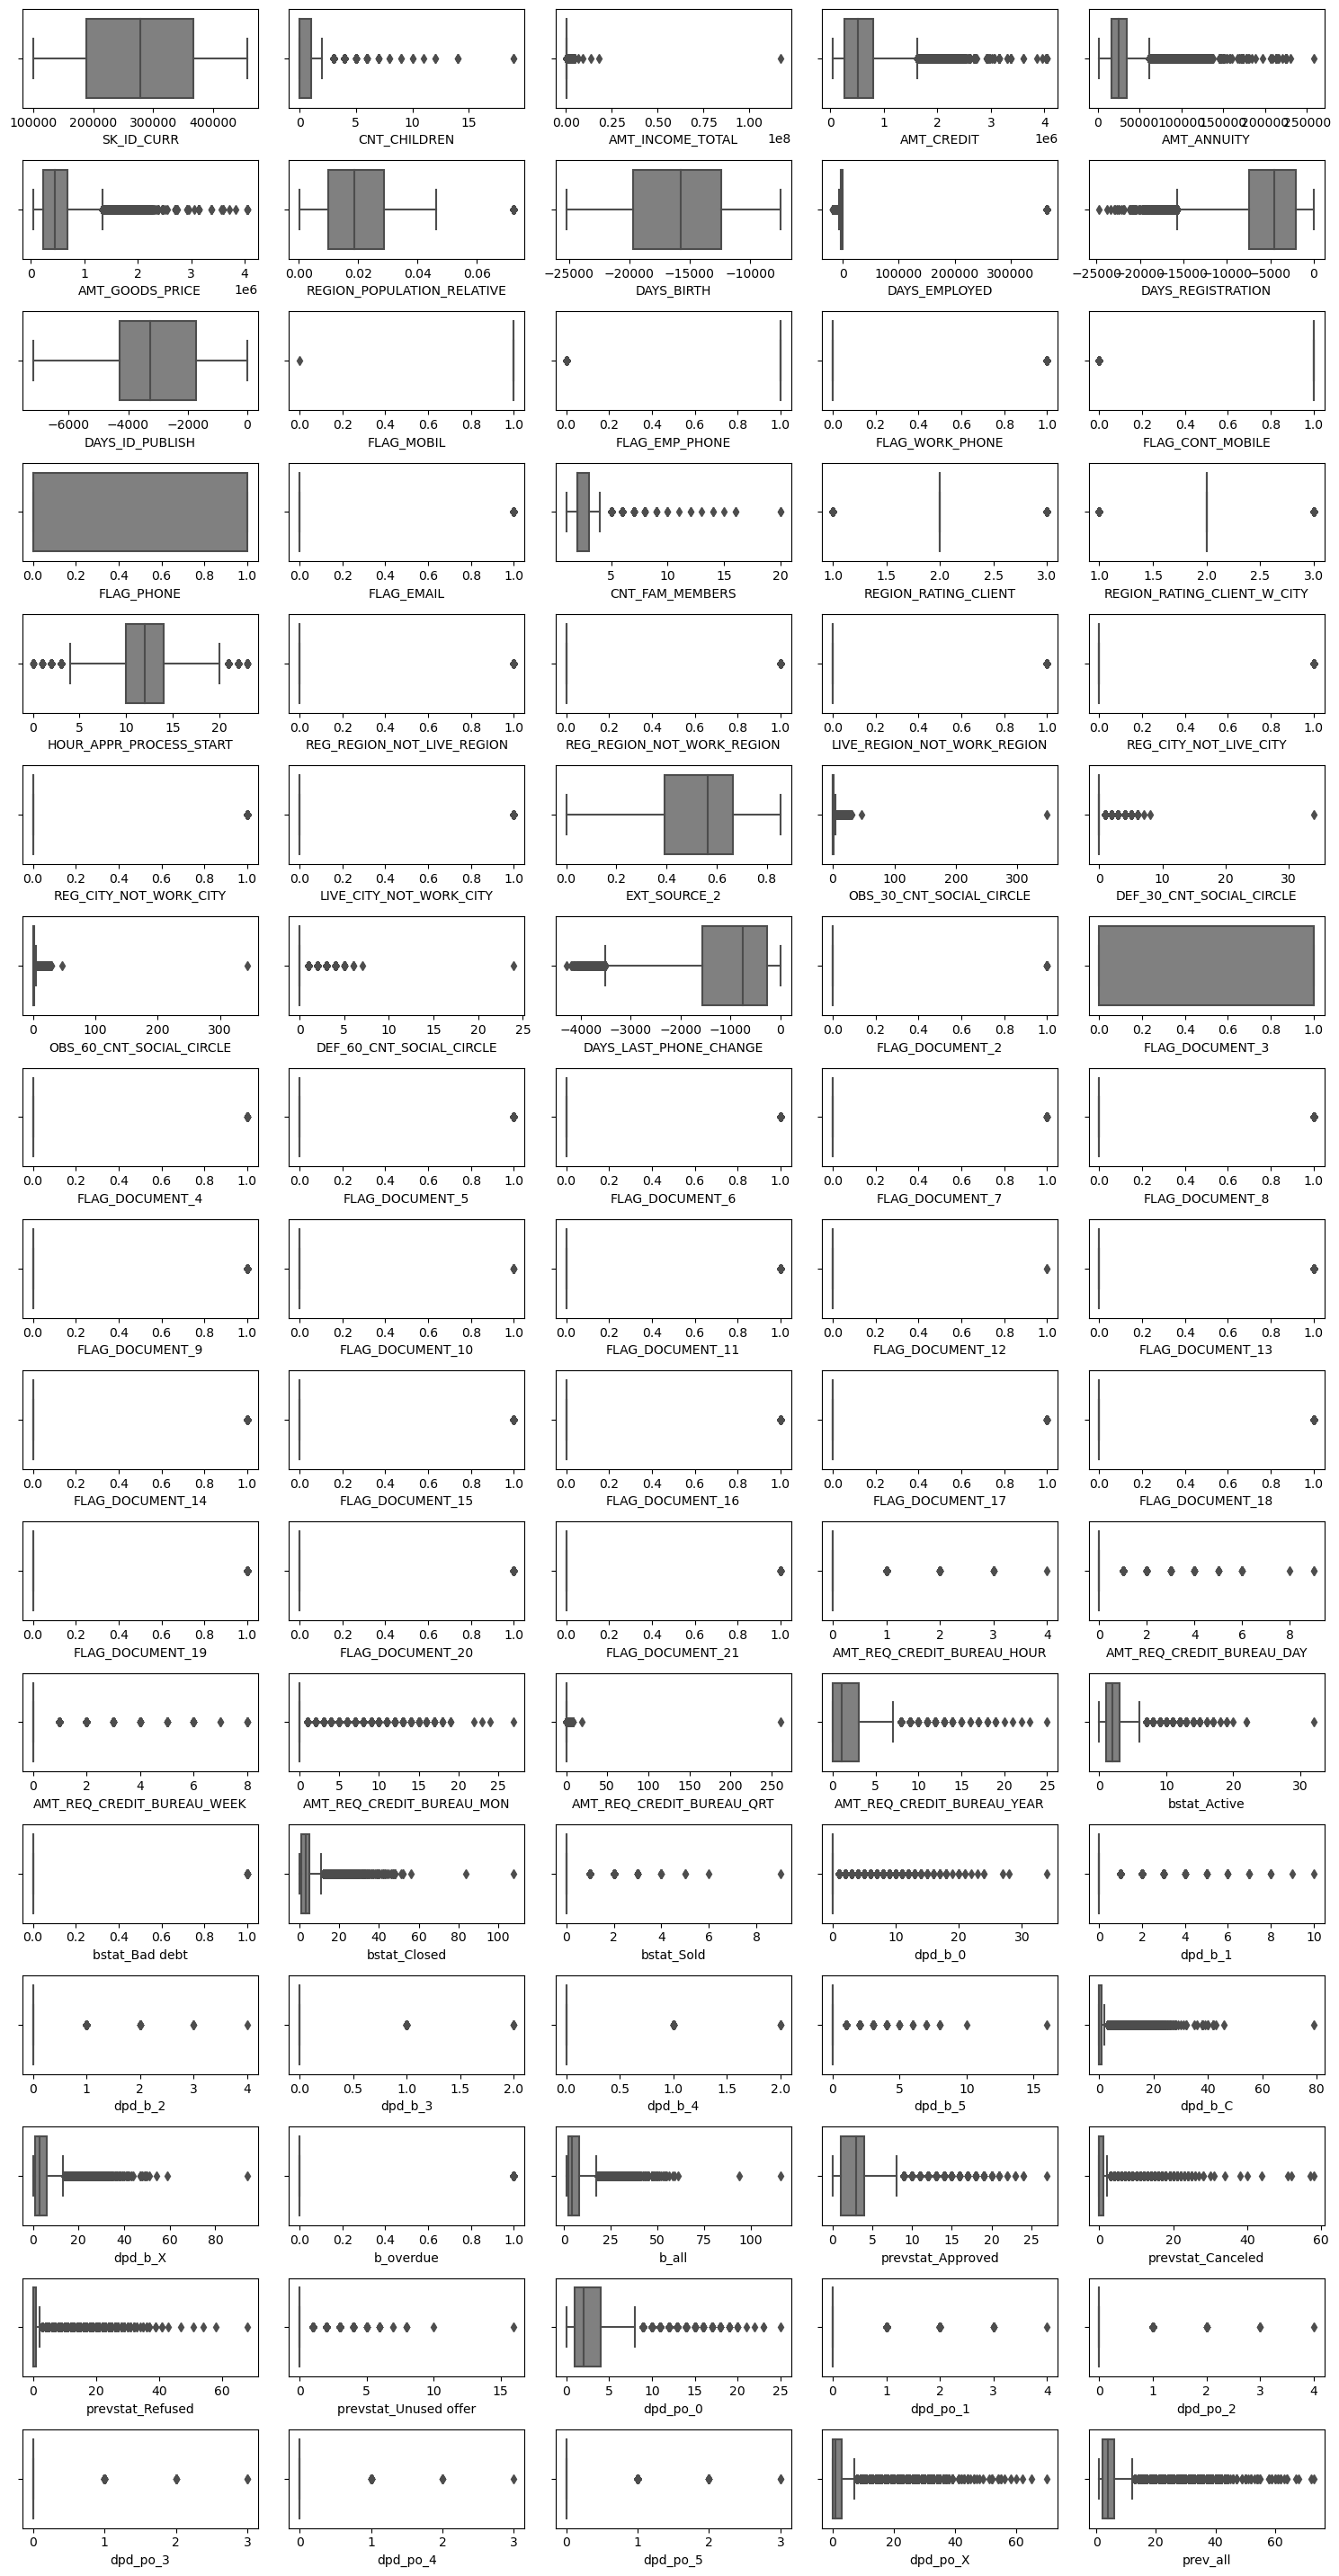

In [27]:
plt.figure(figsize=(15, 30))
n=1
for i in range(0, len(num)):
    if(num[i]!="TARGET"):
        plt.subplot(18, 5, n)
        sns.boxplot(x=data_filter[num[i]], color='gray', orient='h')
        plt.tight_layout()
        n+=1

### Numerical Bivariate Analysis

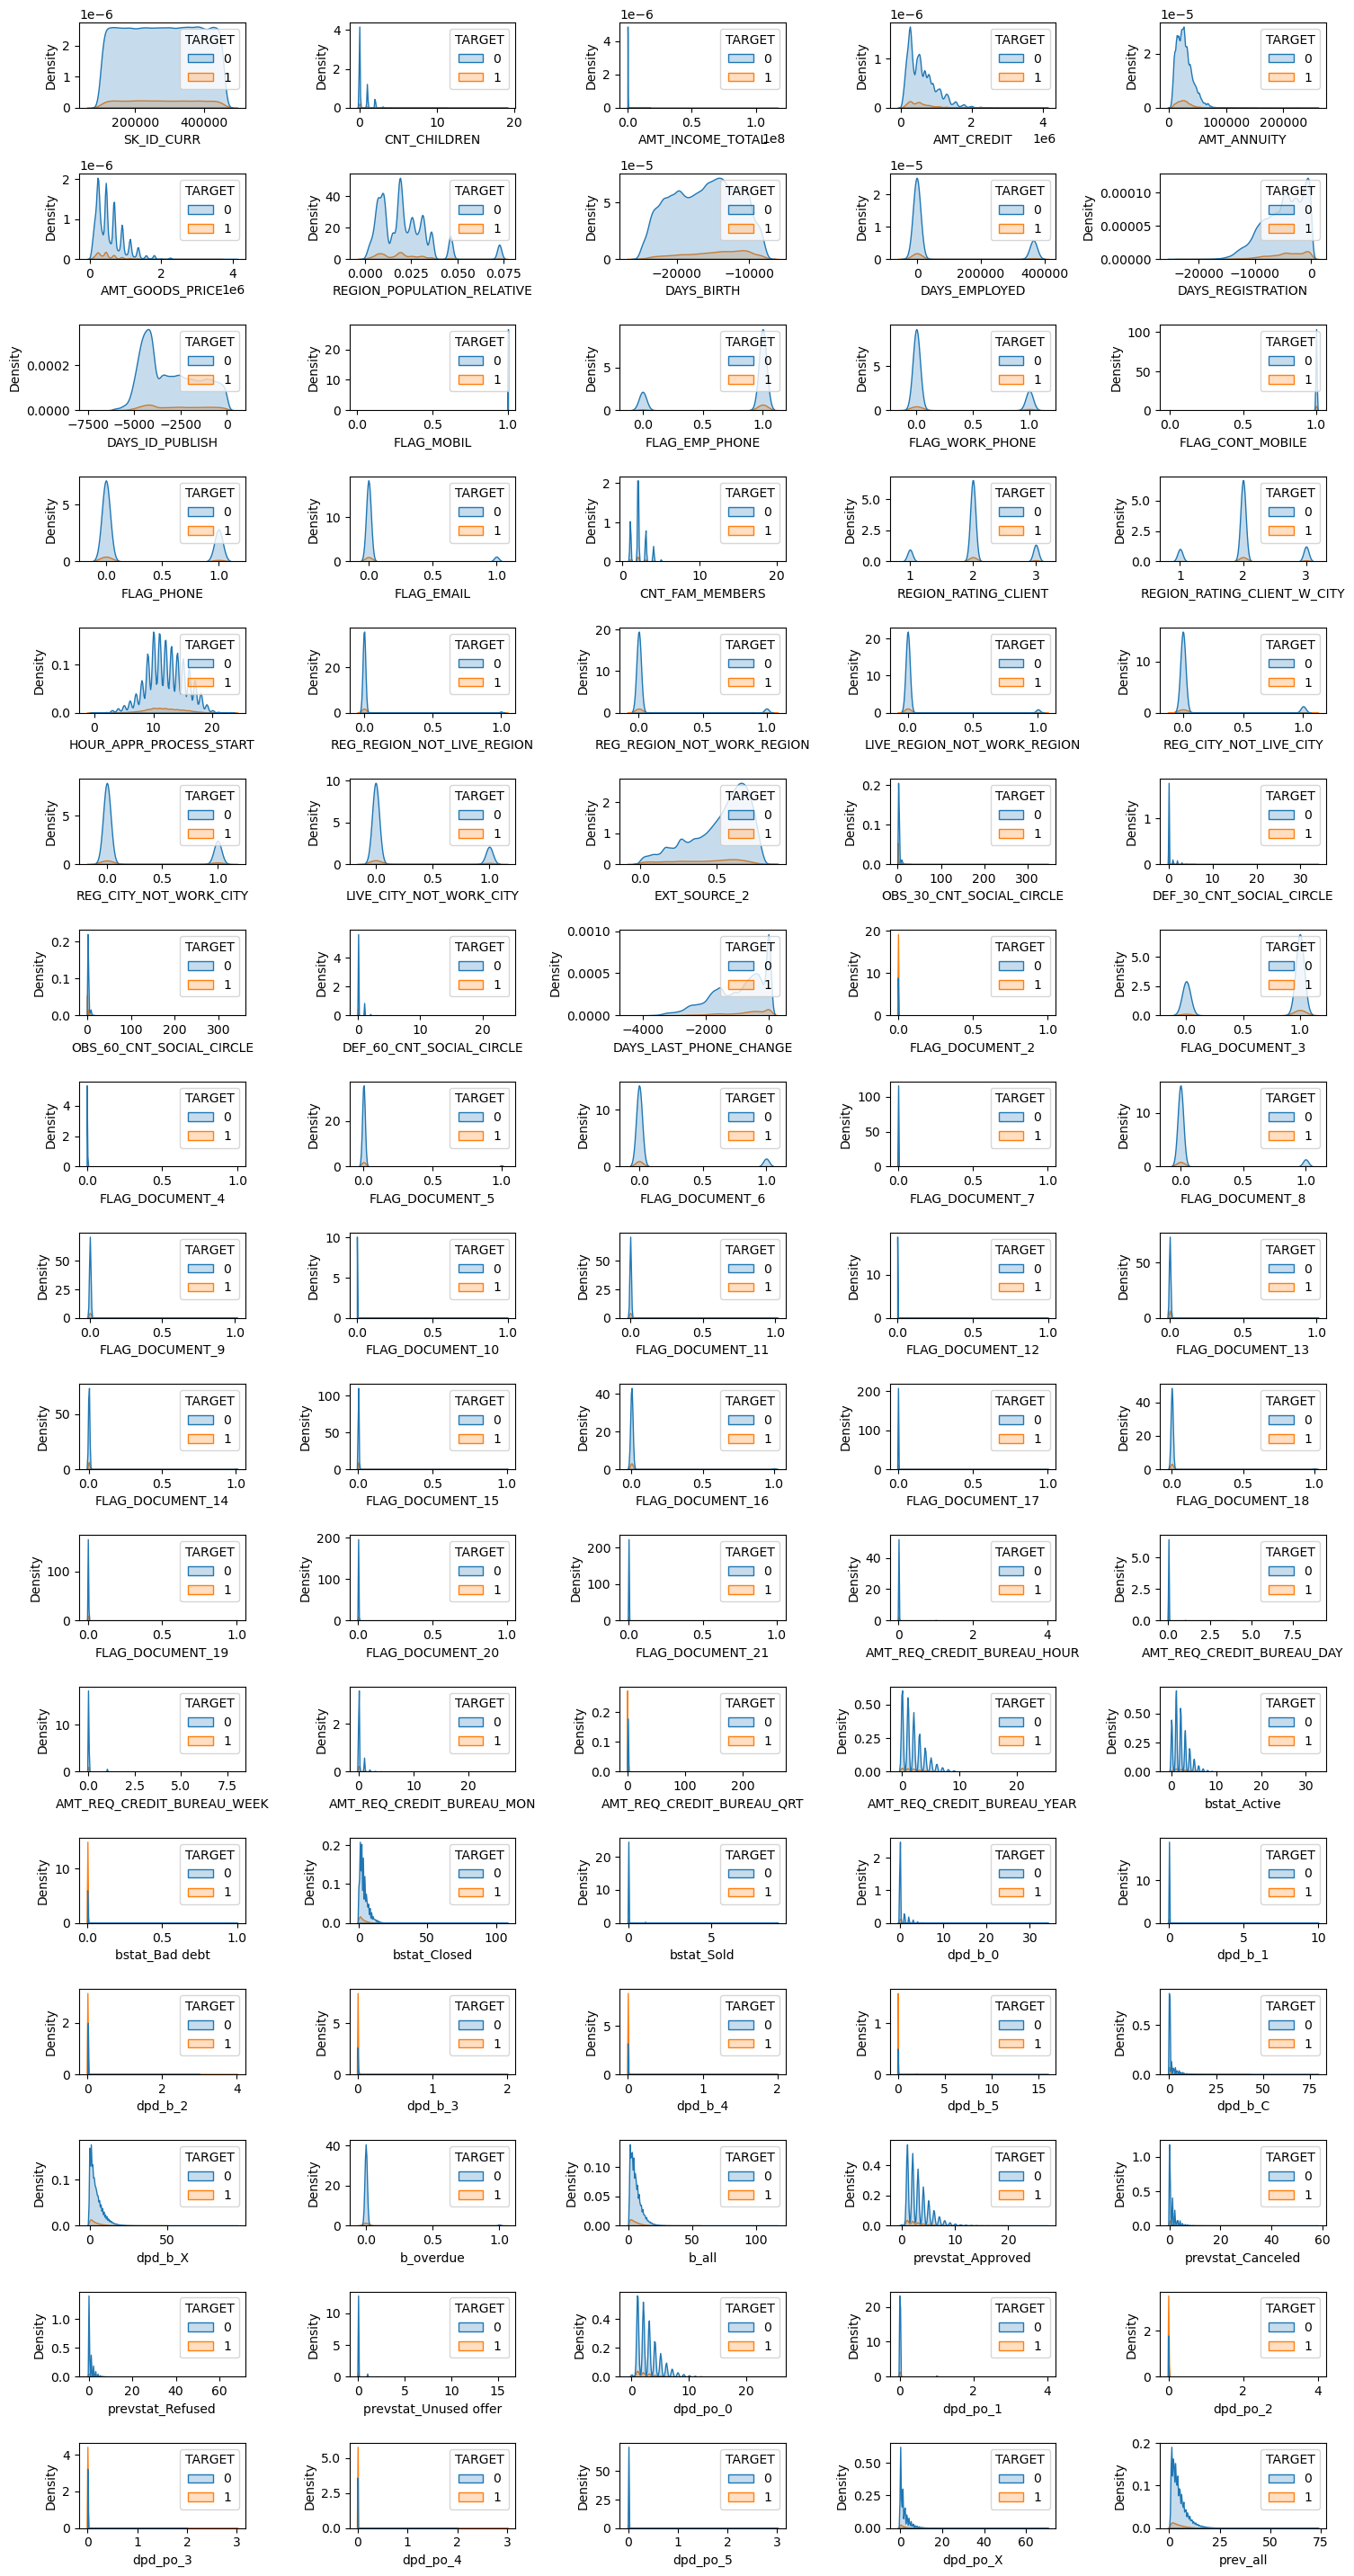

In [28]:
plt.figure(figsize=(15, 30))
n=1
for i in range(0, len(num)):
    if(num[i]!="TARGET"):
        plt.subplot(18, 5, n)
        sns.kdeplot(x=num[i], color='gray',shade=True, hue='TARGET', data = data_filter)
        plt.tight_layout()
        n+=1

### Categorical Univariate Analysis

In [29]:
data_filter.describe(exclude=[np.number]).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901


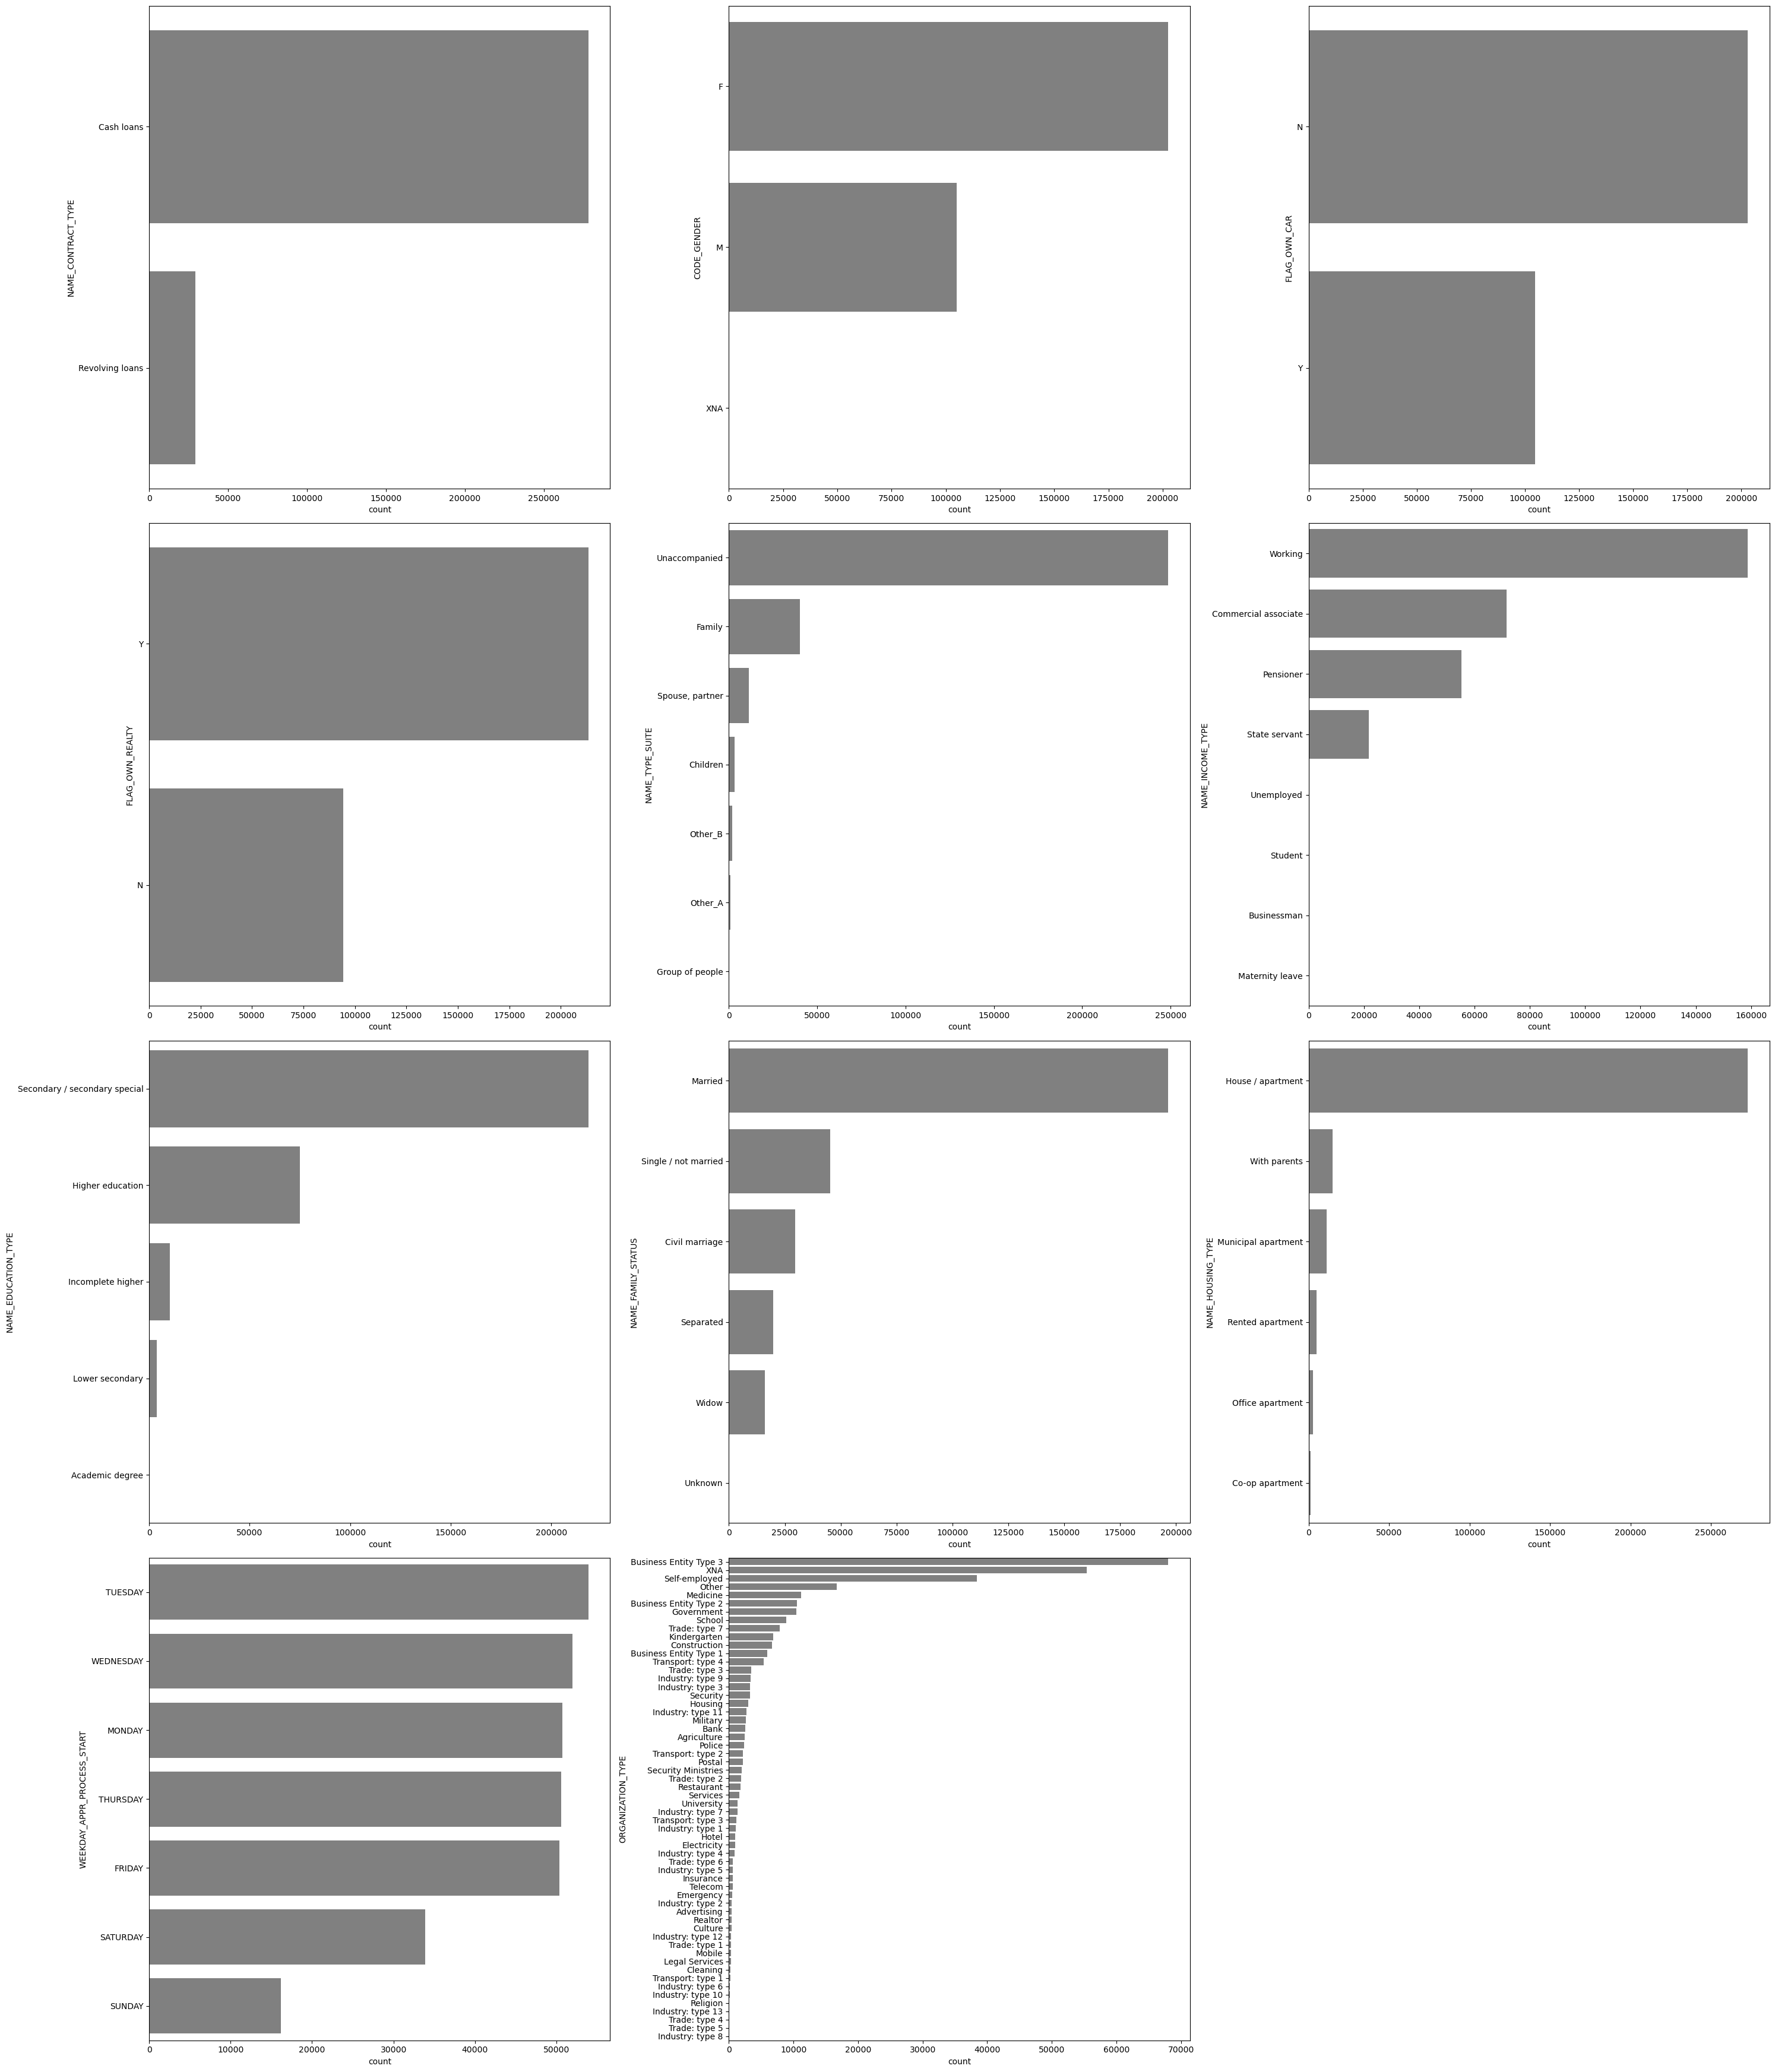

In [30]:
plt.figure(figsize=(30, 35))
for i in range(0, len(cat)):
    plt.subplot(4, 3, i+1)
    sns.countplot(y=cat[i], color='gray', order = data_filter[cat[i]].value_counts().index, data = data_filter)
    plt.tight_layout()

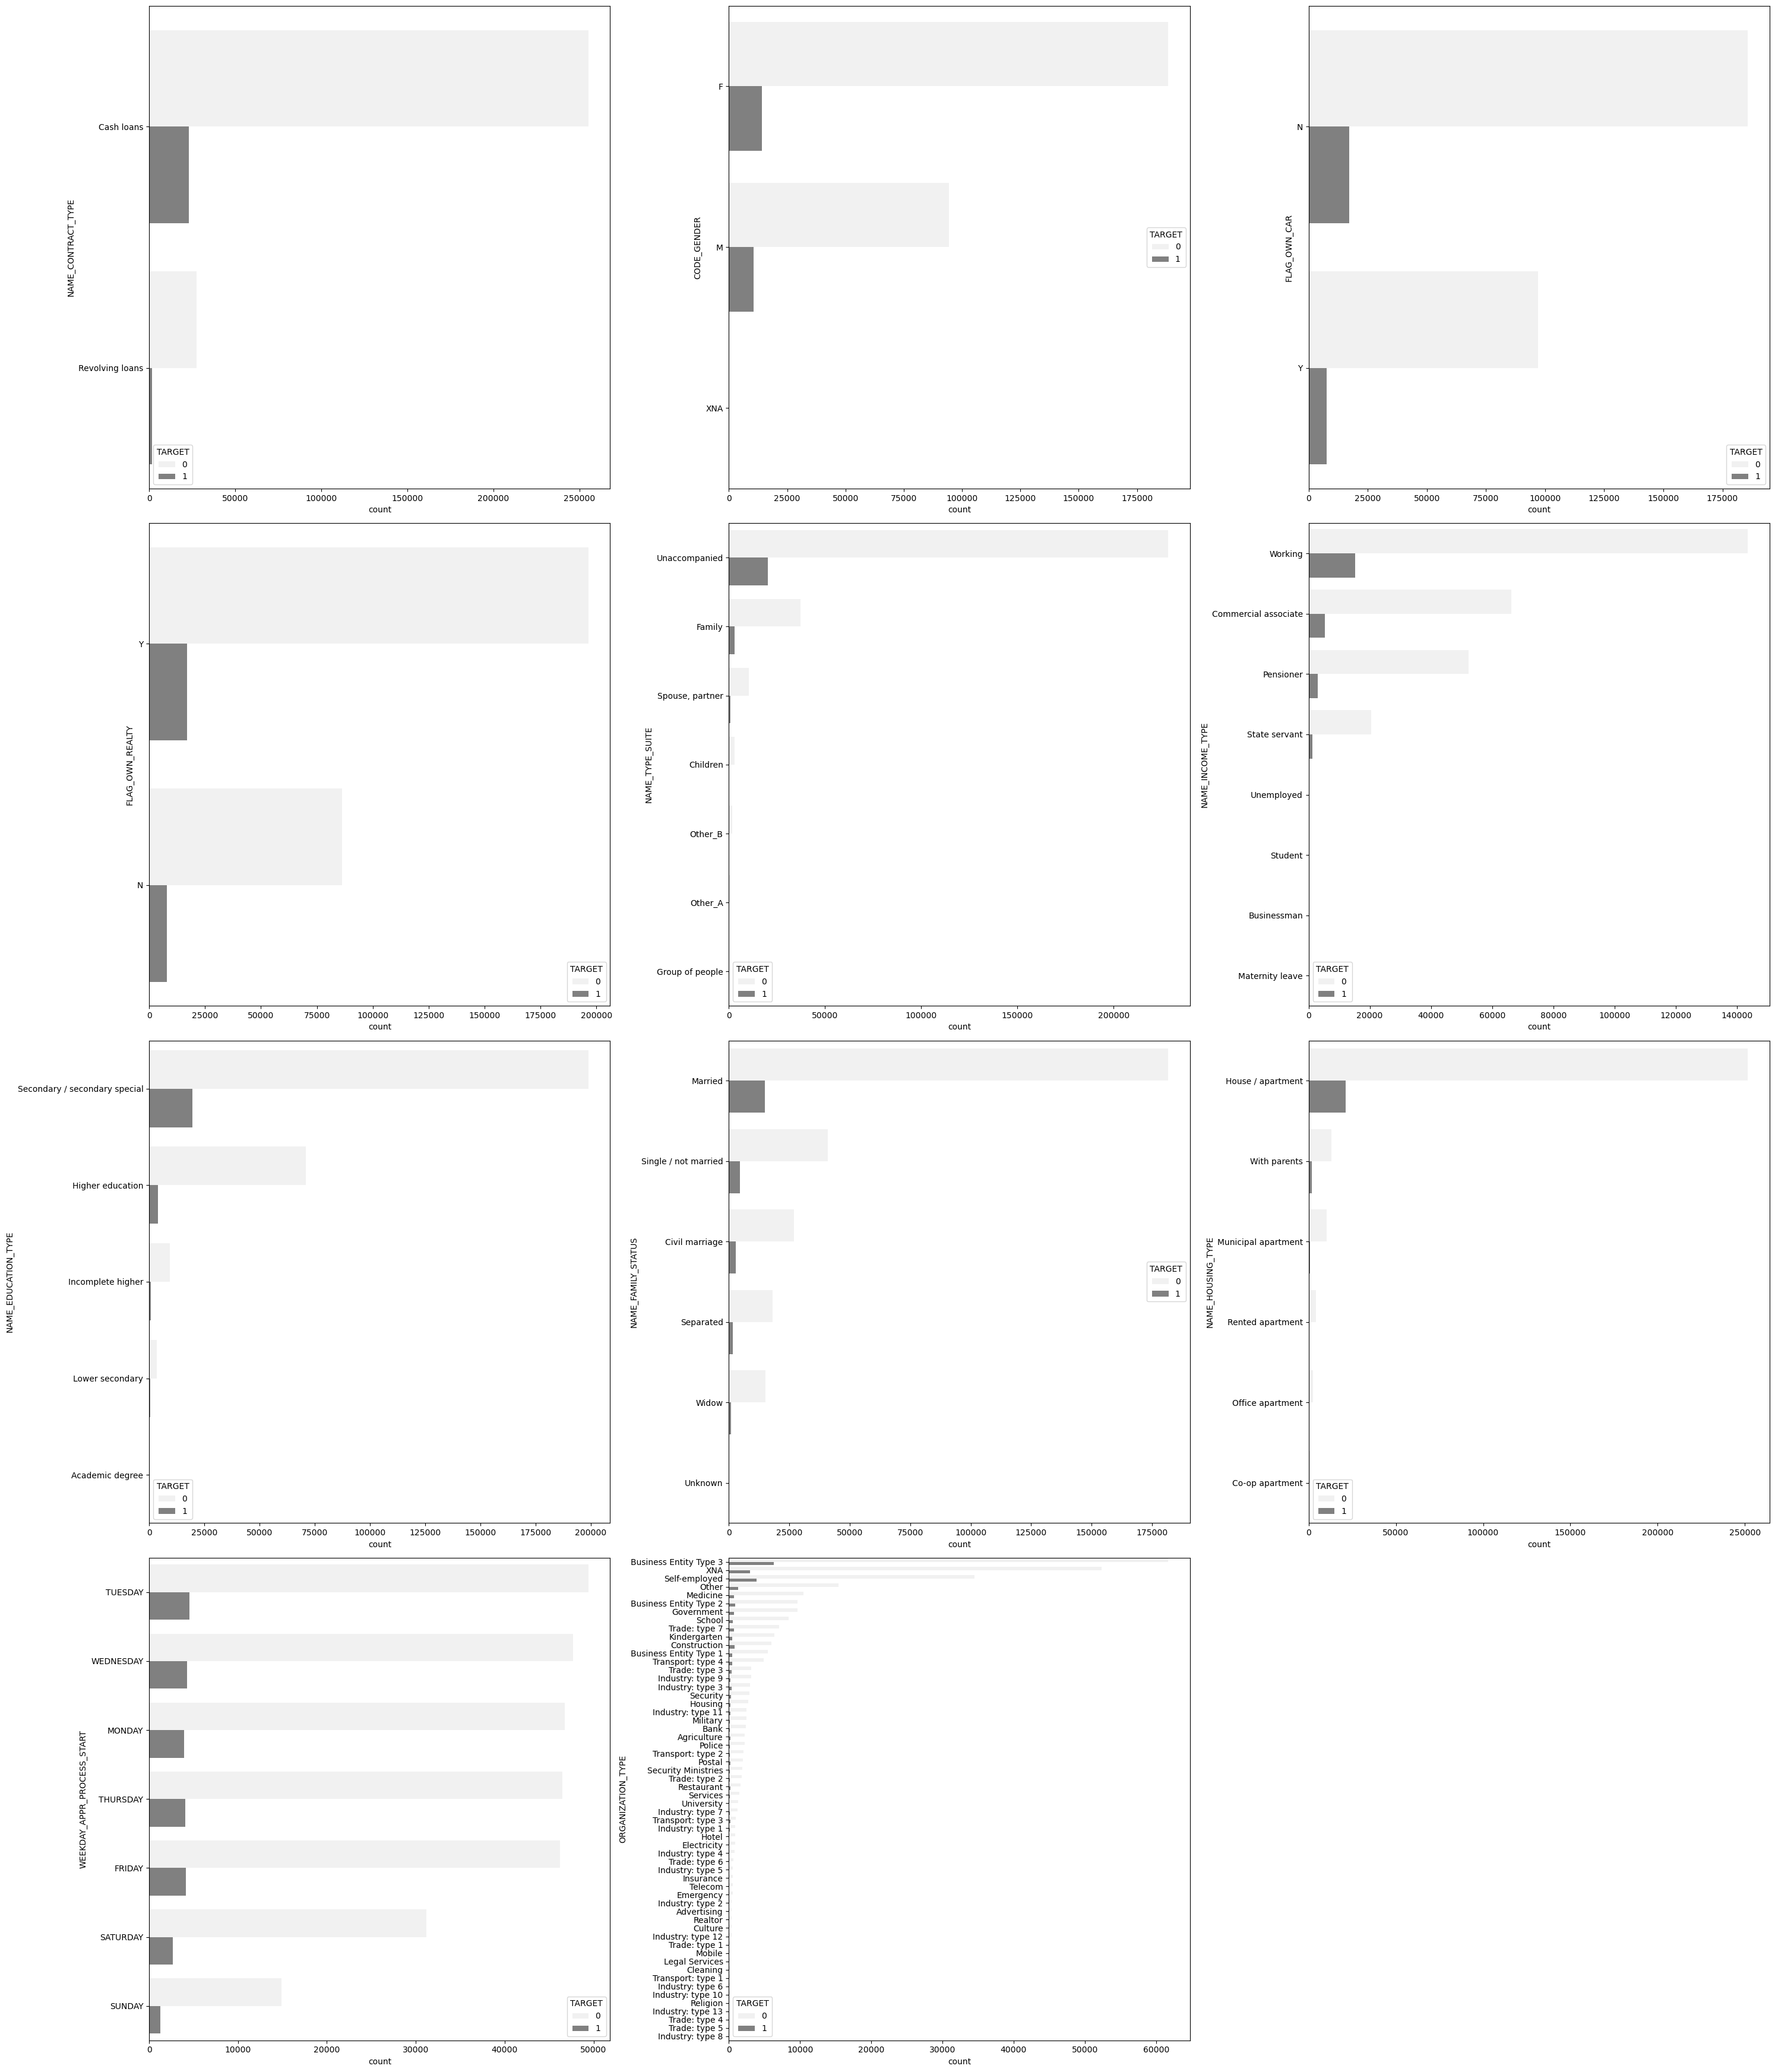

In [31]:
plt.figure(figsize=(30, 35))
for i in range(0, len(cat)):
    plt.subplot(4, 3, i+1)
    sns.countplot(y=cat[i], color='gray', order = data_filter[cat[i]].value_counts().index,\
                  hue='TARGET', data = data_filter)
    plt.tight_layout()

In [32]:
data_filter[num].corr().T

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,prevstat_Refused,prevstat_Unused offer,dpd_po_0,dpd_po_1,dpd_po_2,dpd_po_3,dpd_po_4,dpd_po_5,dpd_po_X,prev_all
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.003248,0.000692,0.002261,0.002626,0.000489,0.002180,0.002436,-0.001919,0.002538,0.003001
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,0.064469,0.000517,-0.034151,0.019872,0.015694,0.015981,0.006570,0.003515,0.049312,0.019762
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,-0.020283,0.034976,-0.008279,0.005727,-0.001905,-0.002343,-0.001057,-0.002806,-0.034388,-0.028689
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.022947,0.009522,0.017556,-0.001104,-0.002246,-0.001188,-0.001543,-0.003067,0.030206,0.030183
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,-0.033758,-0.003989,0.017096,-0.002110,0.015550,0.011698,0.007110,0.007109,-0.025810,-0.010019
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,-0.003253,-0.002095,0.000892,-0.004149,0.006015,0.007540,0.002456,0.000312,0.002458,0.002175
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,-0.033806,-0.001155,0.018256,-0.001301,0.017391,0.013978,0.008610,0.006724,-0.025483,-0.009170
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.003943,0.015406,-0.000298,-0.001409,0.000938,0.002127,-0.000876,-0.006285,0.009614,0.006653
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,-0.005893,0.082138,-0.081317,-0.005189,-0.005609,-0.006193,-0.004482,-0.012818,-0.045321,-0.072641
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.002398,-0.059699,0.043013,0.000472,0.002643,0.007327,0.000829,0.003453,0.024481,0.038682


## Data Pre Processing

### Filling Missing Data 

In [33]:
data_filter['AMT_ANNUITY'] = data_filter['AMT_ANNUITY'].fillna(data_filter['AMT_ANNUITY'].median())
data_filter['AMT_GOODS_PRICE'] = data_filter['AMT_GOODS_PRICE'].fillna(data_filter['AMT_GOODS_PRICE'].median())
data_filter['NAME_TYPE_SUITE'] = data_filter['NAME_TYPE_SUITE'].fillna(data_filter['NAME_TYPE_SUITE'].mode()[0])
data_filter['CNT_FAM_MEMBERS'] = data_filter['CNT_FAM_MEMBERS'].fillna(data_filter['CNT_FAM_MEMBERS'].mode()[0])
data_filter['EXT_SOURCE_2'] = data_filter['EXT_SOURCE_2'].fillna(data_filter['EXT_SOURCE_2'].median())
data_filter['DAYS_LAST_PHONE_CHANGE'] = data_filter['DAYS_LAST_PHONE_CHANGE'].fillna(data_filter['DAYS_LAST_PHONE_CHANGE'].median())
    
for i in range (40,44) :
    data_filter[data_filter.columns[i]] = data_filter[data_filter.columns[i]].fillna(data_filter[data_filter.columns[i]].mode()[0])
    print(data_filter.columns[i],data_filter[data_filter.columns[i]].mode())
    
for i in range (65,71) :
    data_filter[data_filter.columns[i]] = data_filter[data_filter.columns[i]].fillna(data_filter[data_filter.columns[i]].mode()[0])
    print(data_filter.columns[i],data_filter[data_filter.columns[i]].mode())

for i in range (71,97) :
    data_filter[data_filter.columns[i]] = data_filter[data_filter.columns[i]].fillna(0)
    print(data_filter.columns[i],data_filter[data_filter.columns[i]].mode())

OBS_30_CNT_SOCIAL_CIRCLE 0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
DEF_30_CNT_SOCIAL_CIRCLE 0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
OBS_60_CNT_SOCIAL_CIRCLE 0    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
DEF_60_CNT_SOCIAL_CIRCLE 0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
AMT_REQ_CREDIT_BUREAU_HOUR 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
AMT_REQ_CREDIT_BUREAU_DAY 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
AMT_REQ_CREDIT_BUREAU_WEEK 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
AMT_REQ_CREDIT_BUREAU_MON 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
AMT_REQ_CREDIT_BUREAU_QRT 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
AMT_REQ_CREDIT_BUREAU_YEAR 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
bstat_Active 0    0.0
Name: bstat_Active, dtype: float64
bstat_Bad debt 0    0.0
Name: bstat_Bad debt, dtype: float64
bstat_Closed 0    0.0
Name: bstat_Closed, dtype: float

In [34]:
data_filter.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

### Variance Simplification

In [35]:
# drop feature with high unique
data_c = data_filter.copy()
data_filter = data_filter.drop(['SK_ID_CURR', 'ORGANIZATION_TYPE'], axis=1)

In [36]:
# convert to year
data_filter['AGE'] = round((data_filter['DAYS_BIRTH']/365).abs(),0).astype(int)
data_filter['YEAR_EMP'] = round((data_filter['DAYS_EMPLOYED']/365).abs(),0).astype(int)
data_filter['YEAR_REGISTERED'] = round((data_filter['DAYS_REGISTRATION']/365).abs(),0).astype(int)
data_filter['YEAR_PUBLISHED'] = round((data_filter['DAYS_ID_PUBLISH']/365).abs(),0).astype(int)
data_filter['YEAR_LAST_PHONE_CHANGE'] = round((data_filter['DAYS_LAST_PHONE_CHANGE']/365).abs(),0).astype(int)

# drop original features
data_filter = data_filter.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1)

In [37]:
#change value
data_filter['CODE_GENDER'] = data_filter['CODE_GENDER'].apply(lambda x : data_filter['CODE_GENDER'].mode()[0] if x == 'XNA' else x)  #XNA to mode
data_filter['NAME_TYPE_SUITE'] = data_filter['NAME_TYPE_SUITE'].apply(lambda x : 'Other' if (x=='Other_A') or  (x=='Other_B') else x)#other A and other B
data_filter['NAME_FAMILY_STATUS'] = data_filter['NAME_FAMILY_STATUS'].apply(lambda x : data_filter['NAME_FAMILY_STATUS'].mode()[0] if (x=='Unknown')  else x)

In [38]:
list_data = []
for col in data_filter :
    list_data.append([col, data_filter[col].dtype, 
                     data_filter[col].isna().sum(), round(data_filter[col].isna().sum()/len(data_filter[col])*100,2), 
                     data_filter[col].nunique(), data_filter[col].unique()[0:3]]
                    )
    info_data = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_data

,feature,data_type,amt_null,pct_null,unique,unique_data
0,TARGET,int64,0,0.0,2,"[1, 0]"
1,NAME_CONTRACT_TYPE,object,0,0.0,2,"[Cash loans, Revolving loans]"
2,CODE_GENDER,object,0,0.0,2,"[M, F]"
3,FLAG_OWN_CAR,object,0,0.0,2,"[N, Y]"
4,FLAG_OWN_REALTY,object,0,0.0,2,"[Y, N]"
5,CNT_CHILDREN,int64,0,0.0,15,"[0, 1, 2]"
6,AMT_INCOME_TOTAL,float64,0,0.0,2548,"[202500.0, 270000.0, 67500.0]"
7,AMT_CREDIT,float64,0,0.0,5603,"[406597.5, 1293502.5, 135000.0]"
8,AMT_ANNUITY,float64,0,0.0,13672,"[24700.5, 35698.5, 6750.0]"
9,AMT_GOODS_PRICE,float64,0,0.0,1002,"[351000.0, 1129500.0, 135000.0]"


### Feature Engineering

### Feature Selection


#### 2. Select K Feature
#### 3. Annova

#### 1. WoE (Weight of Evidence) and IV (Information Value)
#### Information Value
- Less than 0.02	Not useful for prediction
- 0.02 to 0.1	Weak predictive Power
- 0.1 to 0.3	Medium predictive Power
- 0.3 to 0.5	Strong predictive Power
- more than 0.5	Suspicious Predictive Power

In [39]:
from optbinning import OptimalBinning

(CVXPY) Mar 05 10:10:14 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 05 10:10:14 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [40]:
num = data_filter.select_dtypes(include='number').columns[1:]
cat = data_filter.select_dtypes(include='object').columns

len(num), len(cat)

(84, 10)

In [41]:
feature_num = []
iv_num = []

for i in range (len(num)) :
    x = data_filter[num[i]]
    y = data_filter['TARGET']
    
    optb = OptimalBinning(name=num[i], dtype="numerical", solver="cp")
    optb.fit(x, y)
    binning_table = optb.binning_table
    iv_num = np.append(iv_num, binning_table.build()['IV']['Totals'])
    feature_num = np.append(feature_num,num[i])
df_num = pd.DataFrame({'feature':feature_num,
                       'iv' : iv_num
                      })
feature_cat = []
iv_cat = []

for i in range (len(cat)) :
    x = data_filter[cat[i]]
    y = data_filter['TARGET']
    
    optb = OptimalBinning(name=cat[i], dtype="categorical", solver="mip",
                      cat_cutoff=0.1)
    optb.fit(x, y)
    binning_table = optb.binning_table
    iv_cat = np.append(iv_cat, binning_table.build()['IV']['Totals'])
    feature_cat = np.append(feature_cat,cat[i])
df_cat = pd.DataFrame({'feature':feature_cat,
                       'iv' : iv_cat
                      })

df_iv = pd.concat([df_num,df_cat])

In [42]:
df_iv.sort_values(by='iv',ascending=False)

,feature,iv
22,EXT_SOURCE_2,0.321627
80,YEAR_EMP,0.110850
4,AMT_GOODS_PRICE,0.091633
79,AGE,0.086144
2,AMT_CREDIT,0.059368
5,NAME_INCOME_TYPE,0.057455
69,prevstat_Refused,0.053781
14,REGION_RATING_CLIENT_W_CITY,0.051201
6,NAME_EDUCATION_TYPE,0.049225
13,REGION_RATING_CLIENT,0.048317


In [43]:
#filter iv value weak till strong predictive
result_iv = df_iv[df_iv['iv']>0.02].sort_values(by='iv',ascending=False).reset_index(drop=True)
result_iv

,feature,iv
0,EXT_SOURCE_2,0.321627
1,YEAR_EMP,0.110850
2,AMT_GOODS_PRICE,0.091633
3,AGE,0.086144
4,AMT_CREDIT,0.059368
5,NAME_INCOME_TYPE,0.057455
6,prevstat_Refused,0.053781
7,REGION_RATING_CLIENT_W_CITY,0.051201
8,NAME_EDUCATION_TYPE,0.049225
9,REGION_RATING_CLIENT,0.048317


#### 2. Select K Feature for numeric

In [44]:
kdata = data_filter.select_dtypes('number')
#Divide the features into Independent and Dependent Variable
X = kdata.drop('TARGET' , axis =1)
y = kdata['TARGET']

In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 10 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =10)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL',
       'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_2', 'dpd_po_0', 'YEAR_EMP'],
      dtype='object')

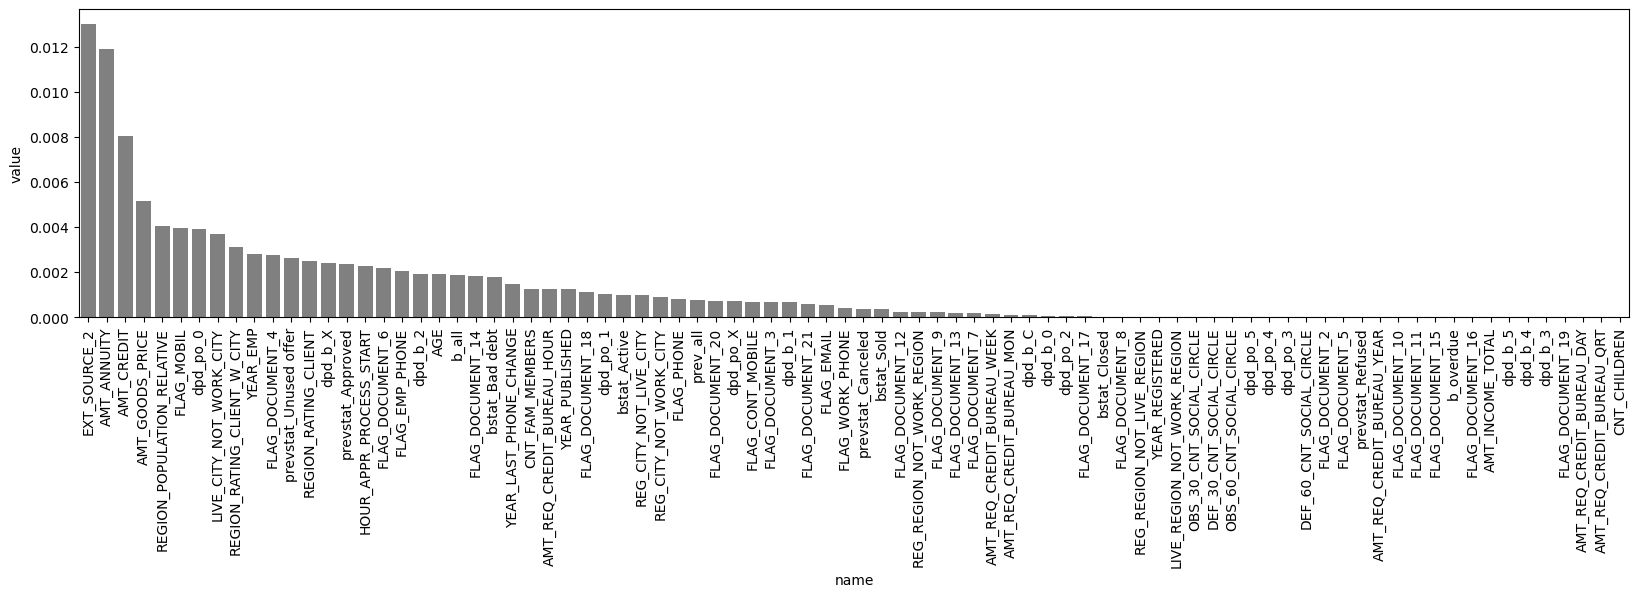

In [46]:
# what are scores for the features
names = []
values = []
for i in range(len(selector.scores_)):
    names.append(kdata.columns[i+1])
    values.append(selector.scores_[i])
pd_df = pd.DataFrame({'name':names,'value':values})

# plot the scores
plt.figure(figsize=(20,4))
sns.barplot(x='name', y='value', color='gray', data=pd_df, \
            order=pd_df.sort_values(by=['value'], ascending=False).set_index('name').index )
plt.xticks(rotation = 90)
plt.show()

#### 3. Select K Feature for Categorical

In [47]:
X = data_filter.select_dtypes(include=['object']).iloc[:, :-1].values
y = data_filter['TARGET'].values

In [48]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [50]:
def select_features(X_train, y_train, X_test, k_value='all'):
    fs = SelectKBest(score_func=chi2, k=k_value)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [51]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 187.939114
Feature 1: 387.997100
Feature 2: 77.790624
Feature 3: 2.909705
Feature 4: 5.537311
Feature 5: 621.146909
Feature 6: 296.745674
Feature 7: 0.894981
Feature 8: 156.356545


In [52]:
cat

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

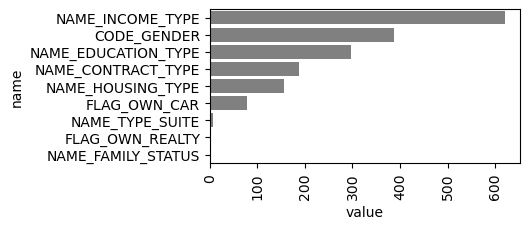

In [53]:
# what are scores for the features
names = []
values = []
for i in range(len(fs.scores_)):
    names.append(cat[i])
    values.append(fs.scores_[i])
pd_df = pd.DataFrame({'name':names,'value':values})

# plot the scores
plt.figure(figsize=(4,2))
sns.barplot(x='value', y='name', color='gray', data=pd_df, \
            order=pd_df.sort_values(by=['value'], ascending=False).set_index('name').index )
plt.xticks(rotation = 90)
plt.show()

In [54]:
data_filter['FLAG_OWN_CAR'].unique()

array(['N', 'Y'], dtype=object)

### Conclusion Feature Selection

In [55]:
data_select = data_filter[np.append(['TARGET','CNT_FAM_MEMBERS','NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE',\
                                     'FLAG_OWN_CAR','DEF_30_CNT_SOCIAL_CIRCLE','FLAG_MOBIL','AMT_INCOME_TOTAL']\
                                    ,result_iv['feature'])]

<AxesSubplot:>

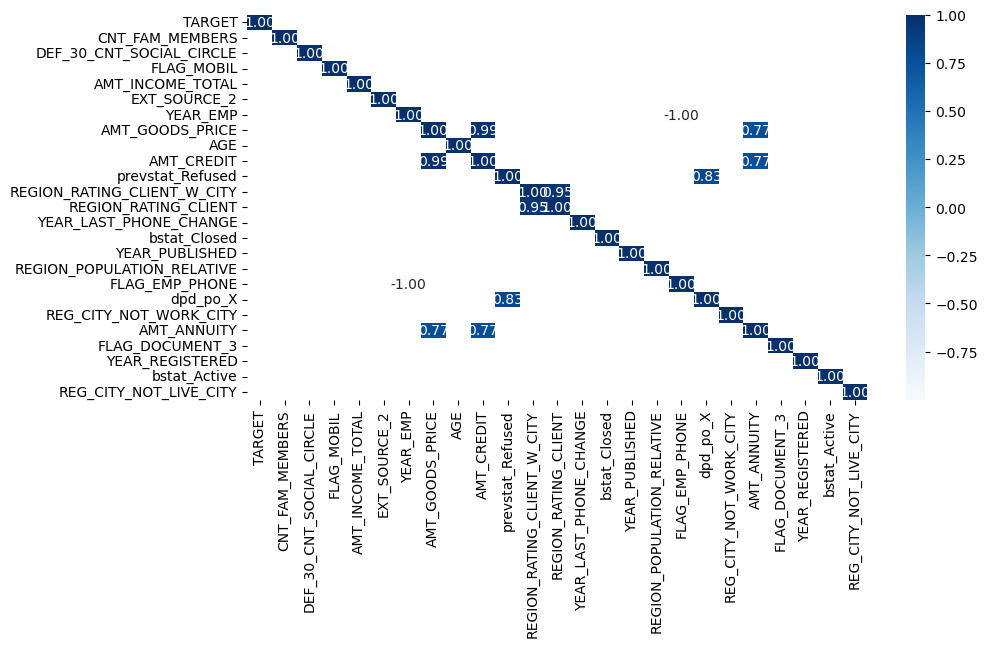

In [56]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_select.corr()[(data_select.corr()>=0.7) | (data_select.corr()<=-0.7)], cmap='Blues', annot=True, fmt='.2f')

In [57]:
data_select = data_select.drop(columns=['dpd_po_X','REGION_RATING_CLIENT','FLAG_EMP_PHONE'])

In [58]:
list_data = []
for col in data_select :
    list_data.append([col, data_select[col].dtype, 
                     data_select[col].isna().sum(), round(data_select[col].isna().sum()/len(data_select[col])*100,2), 
                     data_select[col].nunique(), data_select[col].unique()[0:3]]
                    )
    info_data = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_data.sort_values(by=['data_type','unique'])

,feature,data_type,amt_null,pct_null,unique,unique_data
0,TARGET,int64,0,0.0,2,"[1, 0]"
6,FLAG_MOBIL,int64,0,0.0,2,"[1, 0]"
22,REG_CITY_NOT_WORK_CITY,int64,0,0.0,2,"[0, 1]"
24,FLAG_DOCUMENT_3,int64,0,0.0,2,"[1, 0]"
27,REG_CITY_NOT_LIVE_CITY,int64,0,0.0,2,"[0, 1]"
15,REGION_RATING_CLIENT_W_CITY,int64,0,0.0,3,"[2, 1, 3]"
17,YEAR_LAST_PHONE_CHANGE,int64,0,0.0,13,"[3, 2, 7]"
19,YEAR_PUBLISHED,int64,0,0.0,20,"[6, 1, 7]"
11,AGE,int64,0,0.0,49,"[26, 46, 52]"
9,YEAR_EMP,int64,0,0.0,51,"[2, 3, 1]"


### Feature Encoding 

In [59]:
#Label Encoding (CODE_GENDER)
from sklearn.preprocessing import LabelEncoder
data_encode = data_select.copy()
labelencoder = LabelEncoder()
# Assigning numerical values
data_encode['CODE_GENDER'] = labelencoder.fit_transform(data_encode['CODE_GENDER'])
data_encode['FLAG_OWN_CAR'] = labelencoder.fit_transform(data_encode['FLAG_OWN_CAR'])


#One Hot Encoding (NAME_EDUCATION_TYPE, NAME_INCOME_TYPE)
data_encode = pd.get_dummies(data_encode, columns = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',\
                                                     'NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE'])

In [60]:
# EXT_SOURCE_2
data_encode['EXT_SOURCE_2_2'] = np.where(data_encode['EXT_SOURCE_2']<=0.214, 1,0)
data_encode['EXT_SOURCE_2_2_4'] = np.where((data_encode['EXT_SOURCE_2']>0.214)&(data_encode['EXT_SOURCE_2']<=0.427),1,0)
data_encode['EXT_SOURCE_2_4_6'] = np.where((data_encode['EXT_SOURCE_2']>0.427)&(data_encode['EXT_SOURCE_2']<=0.641),1,0)
data_encode['EXT_SOURCE_2_6'] = np.where(data_encode['EXT_SOURCE_2']>0.641,1,0)

# AMT_CREDIT
data_encode['AMT_CREDIT_0_200k'] = np.where(data_encode['AMT_CREDIT']<=200000,1,0)
data_encode['AMT_CREDIT_200k_400k'] = np.where((data_encode['AMT_CREDIT']>200000)&(data_encode['AMT_CREDIT']<=400000),1,0)
data_encode['AMT_CREDIT_400k_600k'] = np.where((data_encode['AMT_CREDIT']>400000)&(data_encode['AMT_CREDIT']<=600000),1,0)
data_encode['AMT_CREDIT_600k_800k'] = np.where((data_encode['AMT_CREDIT']>600000)&(data_encode['AMT_CREDIT']<=800000),1,0)
data_encode['AMT_CREDIT_800k_1m'] = np.where((data_encode['AMT_CREDIT']>800000)&(data_encode['AMT_CREDIT']<=1000000),1,0)
data_encode['AMT_CREDIT_1m'] = np.where(data_encode['AMT_CREDIT']>1000000,1,0)

# AMT_ANNUITY
data_encode['AMT_ANNUITY_20k'] = np.where(data_encode['AMT_ANNUITY']<=20000,1,0)
data_encode['AMT_ANNUITY_30k'] = np.where((data_encode['AMT_ANNUITY']>20000)&(data_encode['AMT_ANNUITY']<=30000),1,0)
data_encode['AMT_ANNUITY_46k'] = np.where((data_encode['AMT_ANNUITY']>30000)&(data_encode['AMT_ANNUITY']<=46000),1,0)
data_encode['AMT_ANNUITY_50k'] = np.where(data_encode['AMT_ANNUITY']>46000,1,0)

# YEAR_EMP
data_encode['YEAR_EMP_2'] = np.where(data_encode['YEAR_EMP']<=2,1,0)
data_encode['YEAR_EMP_2_4'] = np.where((data_encode['YEAR_EMP']>2)&(data_encode['YEAR_EMP']<=4),1,0)
data_encode['YEAR_EMP_4_6'] = np.where((data_encode['YEAR_EMP']>4)&(data_encode['YEAR_EMP']<=6),1,0)
data_encode['YEAR_EMP_6_8'] = np.where((data_encode['YEAR_EMP']>6)&(data_encode['YEAR_EMP']<=8),1,0)
data_encode['YEAR_EMP_8_15'] = np.where((data_encode['YEAR_EMP']>8)&(data_encode['YEAR_EMP']<=15),1,0)
data_encode['YEAR_EMP_15_30'] = np.where((data_encode['YEAR_EMP']>15)&(data_encode['YEAR_EMP']<=30),1,0)
data_encode['YEAR_EMP_30'] = np.where(data_encode['YEAR_EMP']>30,1,0)

# YEAR_LAST_PHONE_CHANGE
data_encode['YEAR_LAST_PHONE_CHANGE_2'] = np.where(data_encode['YEAR_LAST_PHONE_CHANGE']<=2,1,0)
data_encode['YEAR_LAST_PHONE_CHANGE_2_4'] = np.where((data_encode['YEAR_LAST_PHONE_CHANGE']>2)&(data_encode['YEAR_LAST_PHONE_CHANGE']<=4),1,0)
data_encode['YEAR_LAST_PHONE_CHANGE_4_6'] = np.where((data_encode['YEAR_LAST_PHONE_CHANGE']>4)&(data_encode['YEAR_LAST_PHONE_CHANGE']<=6),1,0)
data_encode['YEAR_LAST_PHONE_CHANGE_7'] = np.where(data_encode['YEAR_LAST_PHONE_CHANGE']>6,1,0)

# YEAR_PUBLISHED
data_encode['YEAR_PUBLISHED_4'] = np.where(data_encode['YEAR_PUBLISHED']<=4,1,0)
data_encode['YEAR_PUBLISHED_4_8'] = np.where((data_encode['YEAR_PUBLISHED']>4)&(data_encode['YEAR_PUBLISHED']<=8),1,0)
data_encode['YEAR_PUBLISHED_8_12'] = np.where((data_encode['YEAR_PUBLISHED']>8)&(data_encode['YEAR_PUBLISHED']<=12),1,0)
data_encode['YEAR_PUBLISHED_12'] = np.where(data_encode['YEAR_PUBLISHED']>12,1,0)

# AGE
data_encode['AGE_20'] = np.where(data_encode['AGE']<20,1,0)
data_encode['AGE_20_30'] = np.where((data_encode['AGE']>=20)&(data_encode['AGE']<30),1,0)
data_encode['AGE_30_40'] = np.where((data_encode['AGE']>=30)&(data_encode['AGE']<40),1,0)
data_encode['AGE_40_50'] = np.where((data_encode['AGE']>=40)&(data_encode['AGE']<50),1,0)
data_encode['AGE_50_60'] = np.where((data_encode['AGE']>=50)&(data_encode['AGE']<60),1,0)
data_encode['AGE_60'] = np.where(data_encode['AGE']>60,1,0)

# REGION_POPULATION_RELATIVE
data_encode['REGION_POPULATION_RELATIVE_1'] = np.where(data_encode['REGION_POPULATION_RELATIVE']<=0.0183,1,0)
data_encode['REGION_POPULATION_RELATIVE_2'] = np.where((data_encode['REGION_POPULATION_RELATIVE']>0.0183)&(data_encode['REGION_POPULATION_RELATIVE']<=0.0364),1,0)
data_encode['REGION_POPULATION_RELATIVE_3'] = np.where((data_encode['REGION_POPULATION_RELATIVE']>0.0364)&(data_encode['REGION_POPULATION_RELATIVE']<=0.0545),1,0)
data_encode['REGION_POPULATION_RELATIVE_4'] = np.where((data_encode['REGION_POPULATION_RELATIVE']>0.0545)&(data_encode['REGION_POPULATION_RELATIVE']<=0.0725),1,0)


# YEAR_REGISTERED
data_encode['YEAR_REGISTERED_2'] = np.where(data_encode['YEAR_REGISTERED']<=2,1,0)
data_encode['YEAR_REGISTERED_2_4'] = np.where((data_encode['YEAR_REGISTERED']>2)&(data_encode['YEAR_REGISTERED']<=4),1,0)
data_encode['YEAR_REGISTERED_4_10'] = np.where((data_encode['YEAR_REGISTERED']>4)&(data_encode['YEAR_REGISTERED']<=10),1,0)
data_encode['YEAR_REGISTERED_10_15'] = np.where((data_encode['YEAR_REGISTERED']>10)&(data_encode['YEAR_REGISTERED']<=15),1,0)
data_encode['YEAR_REGISTERED_15_20'] = np.where((data_encode['YEAR_REGISTERED']>15)&(data_encode['YEAR_REGISTERED']<=20),1,0)
data_encode['YEAR_REGISTERED_20_30'] = np.where((data_encode['YEAR_REGISTERED']>20)&(data_encode['YEAR_REGISTERED']<=30),1,0)
data_encode['YEAR_REGISTERED_30'] = np.where(data_encode['YEAR_REGISTERED']>30,1,0)

#b_stat_active
data_encode['bstat_active_2'] = np.where(data_encode['bstat_Active']<=2,1,0)
data_encode['bstat_active_3'] = np.where((data_encode['bstat_Active']>2)&(data_encode['bstat_Active']<=3),1,0)
data_encode['bstat_active_4'] = np.where((data_encode['bstat_Active']>3)&(data_encode['bstat_Active']<=4),1,0)
data_encode['bstat_active_5'] = np.where(data_encode['bstat_Active']>5,1,0)

# prevstat_Refused
data_encode['prevstat_Refused_2'] = np.where(data_encode['prevstat_Refused']<=2,1,0)
data_encode['prevstat_Refused_3'] = np.where((data_encode['prevstat_Refused']>2)&(data_encode['prevstat_Refused']<=3),1,0)
data_encode['prevstat_Refused_4'] = np.where((data_encode['prevstat_Refused']>3)&(data_encode['prevstat_Refused']<=4),1,0)
data_encode['prevstat_Refused_5'] = np.where(data_encode['prevstat_Refused']>5,1,0)

# bstat_closed
data_encode['bstat_closed_2'] = np.where(data_encode['bstat_Closed']<=2,1,0)
data_encode['bstat_closed_3'] = np.where((data_encode['bstat_Closed']>2)&(data_encode['bstat_Closed']<=3),1,0)
data_encode['bstat_closed_4'] = np.where((data_encode['bstat_Closed']>3)&(data_encode['bstat_Closed']<=4),1,0)
data_encode['bstat_closed_5'] = np.where(data_encode['bstat_Closed']>5,1,0)

# CNT_FAM_MEMBERS
data_encode['CNT_FAM_MEMBERS_2'] = np.where(data_encode['CNT_FAM_MEMBERS']==2,1,0)
data_encode['CNT_FAM_MEMBERS_2_4'] = np.where((data_encode['CNT_FAM_MEMBERS']>2)&(data_encode['CNT_FAM_MEMBERS']<=4),1,0)
data_encode['CNT_FAM_MEMBERS_4_6'] = np.where((data_encode['CNT_FAM_MEMBERS']>4)&(data_encode['CNT_FAM_MEMBERS']<=6),1,0)
data_encode['CNT_FAM_MEMBERS_6'] = np.where(data_encode['CNT_FAM_MEMBERS']>6,1,0)

# AMT_GOODS_PRICE
data_encode['AMT_GOODS_PRICE_300k'] = np.where(data_encode['AMT_GOODS_PRICE']<=300000,1,0)
data_encode['AMT_GOODS_PRICE_600k'] = np.where((data_encode['AMT_GOODS_PRICE']>300000)&(data_encode['AMT_GOODS_PRICE']<=600000),1,0)
data_encode['AMT_GOODS_PRICE_900k'] = np.where((data_encode['AMT_GOODS_PRICE']>600000)&(data_encode['AMT_GOODS_PRICE']<=900000),1,0)
data_encode['AMT_GOODS_PRICE_1m'] = np.where(data_encode['AMT_GOODS_PRICE']>1000000,1,0)

# AMT_INCOME_TOTAL
data_encode['AMT_INCOME_TOTAL_0_100k'] = np.where(data_encode['AMT_INCOME_TOTAL']<=100000,1,0)
data_encode['AMT_INCOME_TOTAL_100k_150k'] = np.where((data_encode['AMT_INCOME_TOTAL']>100000)&(data_encode['AMT_INCOME_TOTAL']<=150000),1,0)
data_encode['AMT_INCOME_TOTAL_150k_200k'] = np.where((data_encode['AMT_INCOME_TOTAL']>150000)&(data_encode['AMT_INCOME_TOTAL']<=200000),1,0)
data_encode['AMT_INCOME_TOTAL_200k_250k'] = np.where((data_encode['AMT_INCOME_TOTAL']>200000)&(data_encode['AMT_INCOME_TOTAL']<=250000),1,0)
data_encode['AMT_INCOME_TOTAL_250k_300k'] = np.where((data_encode['AMT_INCOME_TOTAL']>250000)&(data_encode['AMT_INCOME_TOTAL']<=300000),1,0)
data_encode['AMT_INCOME_TOTAL_>_300k'] = np.where(data_encode['AMT_INCOME_TOTAL']>300000,1,0)

# DEF_30_CNT_SOCIAL_CIRCLE
data_encode['DEF_30_CNT_SOCIAL_CIRCLE_0'] = np.where(data_encode['DEF_30_CNT_SOCIAL_CIRCLE']==0,1,0)
data_encode['DEF_30_CNT_SOCIAL_CIRCLE_1_4'] = np.where((data_encode['DEF_30_CNT_SOCIAL_CIRCLE']>0)&(data_encode['DEF_30_CNT_SOCIAL_CIRCLE']<=4),1,0)
data_encode['DEF_30_CNT_SOCIAL_CIRCLE_4'] = np.where(data_encode['DEF_30_CNT_SOCIAL_CIRCLE']>4,1,0)



drop_list = ['EXT_SOURCE_2','AMT_CREDIT','AMT_ANNUITY','YEAR_EMP','YEAR_LAST_PHONE_CHANGE','YEAR_PUBLISHED',\
             'AGE','REGION_POPULATION_RELATIVE','YEAR_REGISTERED','bstat_Active','prevstat_Refused','bstat_Closed',\
             'CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE', 'DEF_30_CNT_SOCIAL_CIRCLE','AMT_INCOME_TOTAL']

data_encode = data_encode.drop(drop_list, axis=1)

In [61]:
list_data = []
for col in data_encode :
    list_data.append([col, data_encode[col].dtype, 
                     data_encode[col].isna().sum(), round(data_encode[col].isna().sum()/len(data_encode[col])*100,2), 
                     data_encode[col].nunique(), data_encode[col].unique()[0:3]]
                    )
    info_data = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_data.sort_values(by=['data_type','unique'])

,feature,data_type,amt_null,pct_null,unique,unique_data
8,NAME_EDUCATION_TYPE_Academic degree,uint8,0,0.0,2,"[0, 1]"
9,NAME_EDUCATION_TYPE_Higher education,uint8,0,0.0,2,"[0, 1]"
10,NAME_EDUCATION_TYPE_Incomplete higher,uint8,0,0.0,2,"[0, 1]"
11,NAME_EDUCATION_TYPE_Lower secondary,uint8,0,0.0,2,"[0, 1]"
12,NAME_EDUCATION_TYPE_Secondary / secondary special,uint8,0,0.0,2,"[1, 0]"
13,NAME_INCOME_TYPE_Businessman,uint8,0,0.0,2,"[0, 1]"
14,NAME_INCOME_TYPE_Commercial associate,uint8,0,0.0,2,"[0, 1]"
15,NAME_INCOME_TYPE_Maternity leave,uint8,0,0.0,2,"[0, 1]"
16,NAME_INCOME_TYPE_Pensioner,uint8,0,0.0,2,"[0, 1]"
17,NAME_INCOME_TYPE_State servant,uint8,0,0.0,2,"[0, 1]"


## Split Data

In [62]:
x = data_encode.drop(columns='TARGET',axis=0)
y = data_encode['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

x_train.shape, x_test.shape

((246008, 103), (61503, 103))

In [63]:
print('Target difference:\n', pd.Series(y_train).value_counts()/y_train.shape*100)

Target difference:
 0    91.947416
1     8.052584
Name: TARGET, dtype: float64


## Outlier Handling

plt.figure(figsize=(22, 15))
for i in range(0, x_train.shape[1]):
    plt.subplot(10, 9, i+1)
    sns.distplot(x_train[x_train.columns[i]], color='gray')
    plt.tight_layout()

plt.figure(figsize=(22, 15))
for i in range(0, x_train.shape[1]):
    plt.subplot(10, 9, i+1)
    sns.boxplot(x_train[x_train.columns[i]], color='gray')
    plt.tight_layout()

### Handling Imbalance

In [64]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
sm.fit(x_train, y_train)
x_smote, y_smote = sm.fit_resample(x_train, y_train)

x_smote.shape, x_test.shape, y_smote.shape, y_train.shape

((452396, 103), (61503, 103), (452396,), (246008,))

In [65]:
print('Before Oversampling:\n', pd.Series(y_train).value_counts()/y_train.shape*100)
print('After Oversampling:\n', pd.Series(y_smote).value_counts()/y_smote.shape*100)

Before Oversampling:
 0    91.947416
1     8.052584
Name: TARGET, dtype: float64
After Oversampling:
 1    50.0
0    50.0
Name: TARGET, dtype: float64


## Modelling and Evaluation

### 1. Logistic Regression


In [66]:
# train model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

# stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(lr,
                            param,
                            scoring='roc_auc',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(x_smote,y_smote)

# best hyperparameters
search_lr.best_params_

{'penalty': 'none', 'C': 0.43243243243243246}

In [67]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

best_params = search_lr.best_params_
lr_tuning = LogisticRegression(**best_params)
lr_tuning.fit(x_smote,y_smote)

y_train_pred_proba = lr_tuning.predict_proba(x_train)[:][:,1]
y_test_pred_lr_proba = lr_tuning.predict_proba(x_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))


AUC Train Proba : 0.7028167461796624
AUC Test Proba : 0.7030692637425494


In [69]:
y_test

58296     0
286459    0
81217     0
102593    1
38837     0
         ..
91200     0
186879    0
279990    1
92811     0
118901    0
Name: TARGET, Length: 61503, dtype: int64

In [70]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_train_proba = lr_tuning.predict_proba(x_train)[:][:,1]
y_test_proba = lr_tuning.predict_proba(x_test)[:][:,1]

y_train_pred = lr_tuning.predict(x_train)
y_test_pred = lr_tuning.predict(x_test)

print('TRAINING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_train, y_train_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_test, y_test_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
AUC Score: 0.703
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226198
           1       0.33      0.01      0.02     19810

    accuracy                           0.92    246008
   macro avg       0.63      0.50      0.49    246008
weighted avg       0.87      0.92      0.88    246008

Confussion Matrix ------------------------------------
[[225746    452]
 [ 19583    227]]


TESTING RESULT:
AUC Score: 0.703
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56488
           1       0.31      0.01      0.02      5015

    accuracy                           0.92     61503
   macro avg       0.61      0.50      0.49     61503
weighted avg       0.87      0.92      0.88     61503

Confussion Matrix ------------------------------------
[[56374   114]
 [ 4964

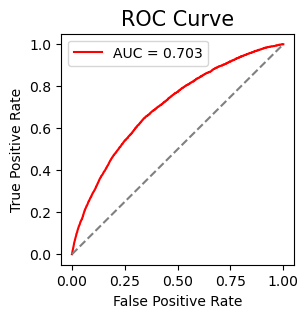

In [89]:
fpr, tpr, tr = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc, color='red')
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()
plt.savefig("ROC.png", bbox_inches='tight',dpi=300, transparent=True)

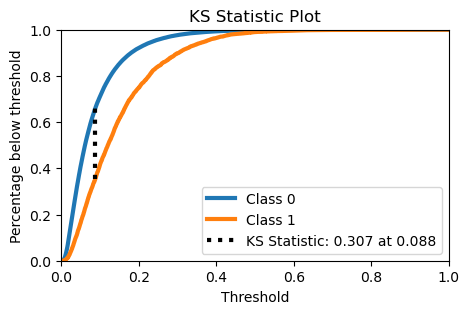

In [90]:
import scikitplot as skplt
y_pred_proba = lr_tuning.predict_proba(x_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(5,3));
plt.savefig("KS.png", bbox_inches='tight',dpi=300, transparent=True)

### 2. Decision Tree

min_samples_split: 2; train: 0.998; test: 0.533
min_samples_split: 4; train: 0.904; test: 0.531
min_samples_split: 7; train: 0.827; test: 0.529
min_samples_split: 10; train: 0.784; test: 0.531
min_samples_split: 13; train: 0.754; test: 0.529
min_samples_split: 16; train: 0.734; test: 0.529
min_samples_split: 19; train: 0.715; test: 0.528
min_samples_split: 22; train: 0.702; test: 0.528
min_samples_split: 25; train: 0.691; test: 0.527
min_samples_split: 27; train: 0.686; test: 0.526
min_samples_split: 30; train: 0.678; test: 0.527
min_samples_split: 33; train: 0.669; test: 0.527
min_samples_split: 36; train: 0.663; test: 0.527
min_samples_split: 39; train: 0.658; test: 0.528
min_samples_split: 42; train: 0.654; test: 0.529
min_samples_split: 45; train: 0.649; test: 0.528
min_samples_split: 48; train: 0.646; test: 0.529
min_samples_split: 51; train: 0.642; test: 0.529
min_samples_split: 53; train: 0.639; test: 0.53
min_samples_split: 56; train: 0.636; test: 0.53
min_samples_split: 59; tr

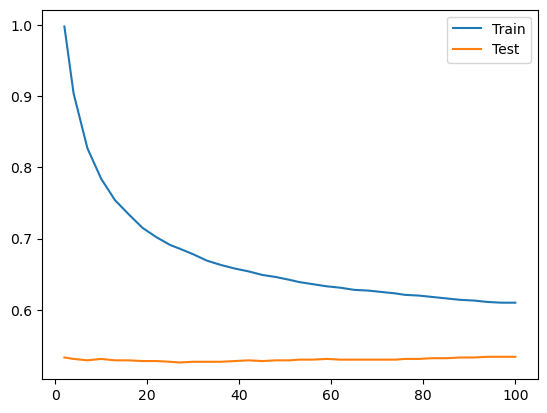

In [73]:
from sklearn.tree import DecisionTreeClassifier

#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion

train_score = []
test_score = []

for x in values :
    model_dt_tunned = DecisionTreeClassifier(min_samples_split=x, 
                                             random_state=123)
    model_dt_tunned.fit(x_smote,y_smote)
    
    # eval on train
    y_pred_train_dt = model_dt_tunned.predict(x_train)
    train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))
    train_score.append(train_dt)
    
    # eval on test
    y_pred_test_dt = model_dt_tunned.predict(x_test)
    test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    test_score.append(test_dt)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_dt) + '; test: ' + str(test_dt))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

max_depth: 2; train: 0.608; test: 0.606
max_depth: 3; train: 0.605; test: 0.604
max_depth: 4; train: 0.607; test: 0.606
max_depth: 5; train: 0.596; test: 0.594
max_depth: 6; train: 0.611; test: 0.608
max_depth: 7; train: 0.606; test: 0.602
max_depth: 8; train: 0.606; test: 0.605
max_depth: 9; train: 0.613; test: 0.607
max_depth: 10; train: 0.606; test: 0.594
max_depth: 11; train: 0.6; test: 0.587
max_depth: 12; train: 0.606; test: 0.588
max_depth: 13; train: 0.613; test: 0.586
max_depth: 14; train: 0.614; test: 0.581
max_depth: 15; train: 0.617; test: 0.578
max_depth: 16; train: 0.62; test: 0.574
max_depth: 17; train: 0.622; test: 0.573
max_depth: 18; train: 0.622; test: 0.569
max_depth: 19; train: 0.625; test: 0.565
max_depth: 20; train: 0.627; test: 0.561
max_depth: 21; train: 0.628; test: 0.561
max_depth: 22; train: 0.632; test: 0.559
max_depth: 23; train: 0.628; test: 0.554
max_depth: 24; train: 0.628; test: 0.551
max_depth: 25; train: 0.626; test: 0.546
max_depth: 26; train: 0.625

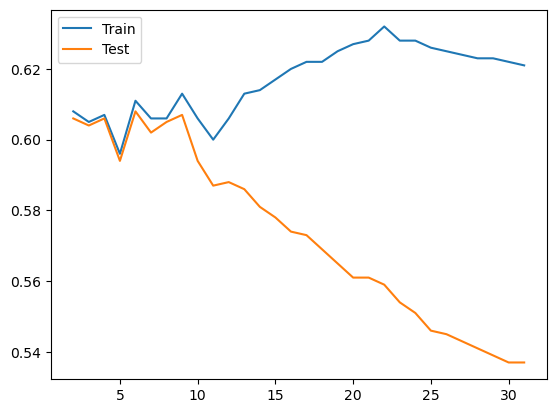

In [74]:
values = [int(x) for x in np.linspace(start=2, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion

train_score = []
test_score = []

for x in values :
    model_dt_tunned = DecisionTreeClassifier(min_samples_split=30,
                                             min_samples_leaf=20,
                                             max_depth=x,
                                             random_state=123)
    model_dt_tunned.fit(x_smote,y_smote)
    
    # eval on train
    y_pred_train_dt = model_dt_tunned.predict(x_train)
    train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))
    train_score.append(train_dt)
    
    # eval on test
    y_pred_test_dt = model_dt_tunned.predict(x_test)
    test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    test_score.append(test_dt)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_dt) + '; test: ' + str(test_dt))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

min_sample_leaf: 1; train: 0.678; test: 0.529
min_sample_leaf: 2; train: 0.664; test: 0.529
min_sample_leaf: 4; train: 0.658; test: 0.528
min_sample_leaf: 5; train: 0.656; test: 0.528
min_sample_leaf: 7; train: 0.651; test: 0.53
min_sample_leaf: 9; train: 0.645; test: 0.531
min_sample_leaf: 10; train: 0.642; test: 0.529
min_sample_leaf: 12; train: 0.638; test: 0.527
min_sample_leaf: 14; train: 0.634; test: 0.528
min_sample_leaf: 15; train: 0.632; test: 0.528
min_sample_leaf: 17; train: 0.626; test: 0.529
min_sample_leaf: 18; train: 0.624; test: 0.532
min_sample_leaf: 20; train: 0.62; test: 0.534
min_sample_leaf: 22; train: 0.614; test: 0.534
min_sample_leaf: 23; train: 0.612; test: 0.534
min_sample_leaf: 25; train: 0.609; test: 0.533
min_sample_leaf: 27; train: 0.608; test: 0.537
min_sample_leaf: 28; train: 0.606; test: 0.535
min_sample_leaf: 30; train: 0.603; test: 0.537
min_sample_leaf: 31; train: 0.603; test: 0.536
min_sample_leaf: 33; train: 0.603; test: 0.539
min_sample_leaf: 35; 

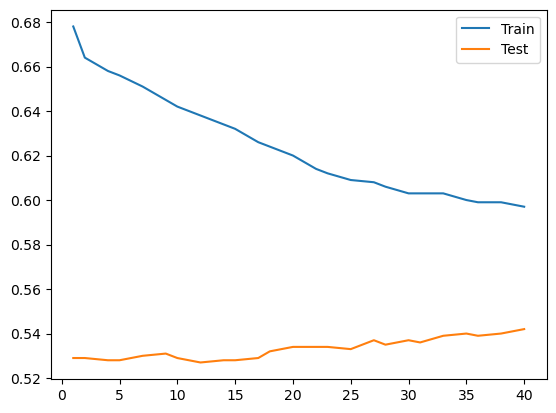

In [75]:
#values = [int(x) for x in np.linspace(start=2, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion

train_score = []
test_score = []

for x in values :
    model_dt_tunned = DecisionTreeClassifier(min_samples_split=30,
                                             min_samples_leaf=x,
                                             max_depth=40,
                                             random_state=123)
    model_dt_tunned.fit(x_smote,y_smote)
    
    # eval on train
    y_pred_train_dt = model_dt_tunned.predict(x_train)
    train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))
    train_score.append(train_dt)
    
    # eval on test
    y_pred_test_dt = model_dt_tunned.predict(x_test)
    test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    test_score.append(test_dt)
    
    print('min_sample_leaf: ' + str(x) + '; train: ' + str(train_dt) + '; test: ' + str(test_dt))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [76]:
model_dt_tunned = DecisionTreeClassifier(min_samples_split=7,
                                             min_samples_leaf=2,
                                             max_depth=6,
                                             random_state=123)
model_dt_tunned.fit(x_smote,y_smote)
    
# eval on train
y_pred_train_dt = model_dt_tunned.predict(x_train)
train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))

# eval on test
y_pred_test_dt = model_dt_tunned.predict(x_test)
test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    
print('AUC Train', train_dt)
print('AUC Test', test_dt)

AUC Train 0.611
AUC Test 0.608


## Feature Importance

In [77]:
import statsmodels.api as sm

X2 = sm.add_constant(x_smote)
est = sm.OLS(y_smote, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:22:52   Log-Likelihood:                -24272.
No. Observations:              452396   AIC:                         4.875e+04
Df Residuals:                  452294   BIC:                         4.987e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [78]:
# Top 5 feature importance and its indicator
# Converting statsmodels summary object to Pandas Dataframe,
df_importance = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0)[0]

# find odds_ratio
for i in df_importance['coef']:
    if i == 0 :
        df_importance['odds_ratio'] = 0
    else:
        df_importance['odds_ratio'] = np.exp(df_importance['coef'])
        
# show top 5 highest odd ratio
df_importance.iloc[1:,:].sort_values(by='odds_ratio', ascending=False).head(20)

,coef,std err,t,P>|t|,[0.025,0.975],odds_ratio
FLAG_MOBIL,2.471000e-01,2.550000e-01,0.968,0.333,-2.530000e-01,7.480000e-01,1.280307
NAME_INCOME_TYPE_Maternity leave,1.249000e-01,1.140000e-01,1.094,0.274,-9.900000e-02,3.490000e-01,1.133035
NAME_INCOME_TYPE_Unemployed,8.900000e-02,6.200000e-02,1.431,0.152,-3.300000e-02,2.110000e-01,1.093081
REGION_RATING_CLIENT_W_CITY,7.900000e-03,1.000000e-03,8.121,0.000,6.000000e-03,1.000000e-02,1.007931
CODE_GENDER,3.400000e-03,1.000000e-03,3.741,0.000,2.000000e-03,5.000000e-03,1.003406
AGE_20,9.841000e-16,6.240000e-16,1.577,0.115,-2.390000e-16,2.210000e-15,1.000000
REGION_POPULATION_RELATIVE_4,-1.782000e-15,5.820000e-16,-3.060,0.002,-2.920000e-15,-6.400000e-16,1.000000
REG_CITY_NOT_WORK_CITY,-1.590000e-02,1.000000e-03,-14.692,0.000,-1.800000e-02,-1.400000e-02,0.984226
FLAG_DOCUMENT_3,-1.710000e-02,1.000000e-03,-16.608,0.000,-1.900000e-02,-1.500000e-02,0.983045
REG_CITY_NOT_LIVE_CITY,-2.340000e-02,2.000000e-03,-13.333,0.000,-2.700000e-02,-2.000000e-02,0.976872


## Creating Score Card

In [80]:
data_encode['SK_ID_CURR'] = data_c['SK_ID_CURR']
data_combine_test = pd.merge(app_test,data_encode,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='left')
data_combine_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER_x,FLAG_OWN_CAR_x,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_GOODS_PRICE_1m,AMT_INCOME_TOTAL_0_100k,AMT_INCOME_TOTAL_100k_150k,AMT_INCOME_TOTAL_150k_200k,AMT_INCOME_TOTAL_200k_250k,AMT_INCOME_TOTAL_250k_300k,AMT_INCOME_TOTAL_>_300k,DEF_30_CNT_SOCIAL_CIRCLE_0,DEF_30_CNT_SOCIAL_CIRCLE_1_4,DEF_30_CNT_SOCIAL_CIRCLE_4
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_combine_test = pd.merge(pd.merge(app_test,join_bureau,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='left'),\
                        join_prev1,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='left')


# convert to year
data_combine_test['AGE'] = round((data_combine_test['DAYS_BIRTH']/365).abs(),0).astype(int)
data_combine_test['YEAR_EMP'] = round((data_combine_test['DAYS_EMPLOYED']/365).abs(),0).astype(int)
data_combine_test['YEAR_REGISTERED'] = round((data_combine_test['DAYS_REGISTRATION']/365).abs(),0).astype(int)
data_combine_test['YEAR_PUBLISHED'] = round((data_combine_test['DAYS_ID_PUBLISH']/365).abs(),0).astype(int)
data_combine_test['YEAR_LAST_PHONE_CHANGE'] = round((data_combine_test['DAYS_LAST_PHONE_CHANGE']/365).abs(),0).astype(int)


#change value
data_combine_test['CODE_GENDER'] = data_combine_test['CODE_GENDER'].apply(lambda x : data_combine_test['CODE_GENDER'].mode()[0] if x == 'XNA' else x)  #XNA to mode
data_combine_test['NAME_TYPE_SUITE'] = data_combine_test['NAME_TYPE_SUITE'].apply(lambda x : 'Other' if (x=='Other_A') or  (x=='Other_B') else x)#other A and other B
data_combine_test['NAME_FAMILY_STATUS'] = data_combine_test['NAME_FAMILY_STATUS'].apply(lambda x : data_combine_test['NAME_FAMILY_STATUS'].mode()[0] if (x=='Unknown')  else x)

# drop original features
data_combine_test = data_combine_test.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1)

data_combine_test = data_combine_test[np.append(['CNT_FAM_MEMBERS','NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE',\
                                     'FLAG_OWN_CAR','DEF_30_CNT_SOCIAL_CIRCLE','FLAG_MOBIL','AMT_INCOME_TOTAL']\
                                    ,result_iv['feature'])]



list_data = []
for col in data_combine_test :
    list_data.append([col, data_combine_test[col].dtype, 
                     data_combine_test[col].isna().sum(), round(data_combine_test[col].isna().sum()/len(data_combine_test[col])*100,2), 
                     data_combine_test[col].nunique(), data_combine_test[col].unique()[0:3]]
                    )
    info_data = pd.DataFrame(data=list_data, columns='feature data_type amt_null pct_null unique unique_data'.split())
info_data.sort_values(by=['data_type','unique'])

## Business Insight

In [96]:
a=data_filter.groupby('TARGET',as_index=False).agg({'AMT_CREDIT':'sum'})
a['%'] = a['AMT_CREDIT']/a['AMT_CREDIT'].sum()*100
a

,TARGET,AMT_CREDIT,%
0,0,1.703602e+11,92.482997
1,1,1.384685e+10,7.517003


### INCOME_TYPE

In [150]:
a=data_filter.groupby(['TARGET','NAME_INCOME_TYPE'],as_index=False).agg({'AMT_CREDIT':'count'})
a = a[a['TARGET']==1]
a.loc[-1] = [1, "Businessman", 0]
a.loc[-2] = [1, "Student", 0]
#a=a.insert(1, "Student", 0)
a['pct'] = a['AMT_CREDIT']/a['AMT_CREDIT'].sum()*100
a

,TARGET,NAME_INCOME_TYPE,AMT_CREDIT,pct
8,1,Commercial associate,5360,21.591138
9,1,Maternity leave,2,0.008056
10,1,Pensioner,2982,12.012085
11,1,State servant,1249,5.031219
12,1,Unemployed,8,0.032226
13,1,Working,15224,61.325277
-1,1,Businessman,0,0.000000
-2,1,Student,0,0.000000


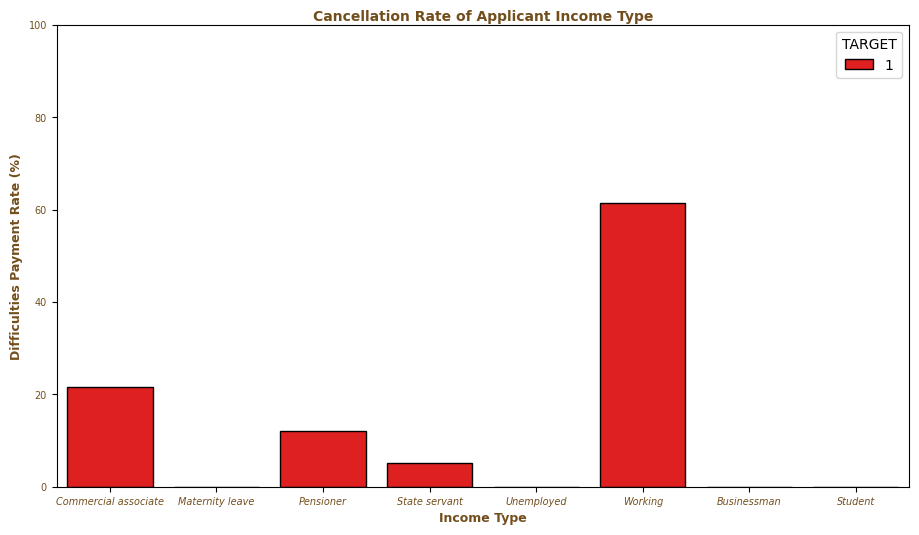

In [151]:
fig,ax = plt.subplots(1,1,figsize=(11,6))
# Create an array with the colors you want to use
colors = ["red", "#fcba64"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.barplot(x='NAME_INCOME_TYPE', y='pct', data=a, hue='TARGET', edgecolor='black')

ax.set_ylabel('Difficulties Payment Rate (%)',fontsize=9,fontweight='bold',color='#734e1d')
plt.yticks(fontsize=7,color='#734e1d')
ax.set_ylim(0,100)

ax.set_xlabel('Income Type',fontsize=9,fontweight='bold',color='#734e1d')
plt.xticks(fontsize=7,fontstyle='italic',color='#734e1d')

ax.set_title('Cancellation Rate of Applicant Income Type', fontsize=10, fontweight='bold',pad=3, color='#734e1d', loc='center')
plt.savefig("Income.png", bbox_inches='tight',dpi=300, transparent=True)

### CODE_GENDER

In [152]:
def segment (x) :
    if (x<20) :
        stat = 'Late Ten'
    elif (x>=20 and x<30) :
        stat = 'Twenty'
    elif (x>=30 and x<40) :
        stat = 'Thirty'
    elif (x>=40 and x<50) :
        stat = 'Fourty'
    elif (x>=50 and x<60) :
        stat = 'Fifty'
    elif (x>=60) :
        stat = 'Above_Sixty'
    
    return stat
    

In [153]:
data_filter['age_stat'] = data_filter['AGE'].apply(lambda x : segment(x))
a=data_filter.groupby(['TARGET','age_stat'],as_index=False).agg({'AMT_CREDIT':'count'})
a = a[a['TARGET']==1]
a['pct'] = a['AMT_CREDIT']/a['AMT_CREDIT'].sum()*100
a

,TARGET,age_stat,AMT_CREDIT,pct
5,1,Above_Sixty,1933,7.786506
6,1,Fifty,4229,17.035247
7,1,Fourty,5983,24.100705
8,1,Thirty,7972,32.112790
9,1,Twenty,4708,18.964753


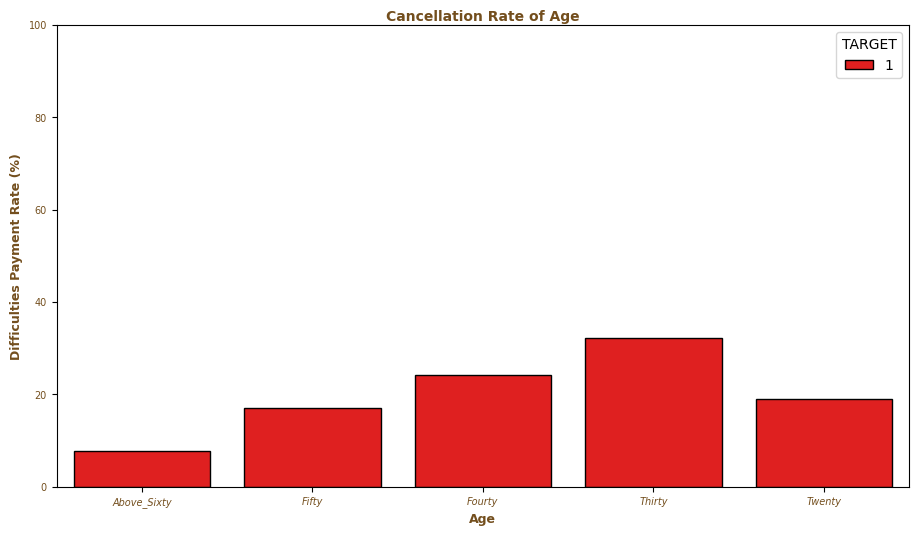

In [156]:
fig,ax = plt.subplots(1,1,figsize=(11,6))
# Create an array with the colors you want to use
colors = ["red", "#fcba64"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.barplot(x='age_stat', y='pct', data=a, hue='TARGET', edgecolor='black')

ax.set_ylabel('Difficulties Payment Rate (%)',fontsize=9,fontweight='bold',color='#734e1d')
plt.yticks(fontsize=7,color='#734e1d')
ax.set_ylim(0,100)

ax.set_xlabel('Age',fontsize=9,fontweight='bold',color='#734e1d')
plt.xticks(fontsize=7,fontstyle='italic',color='#734e1d')

ax.set_title('Cancellation Rate of Age', fontsize=10, fontweight='bold',pad=3, color='#734e1d', loc='center')
plt.savefig("Age.png", bbox_inches='tight',dpi=300, transparent=True)